In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/smoking_driking_dataset_Ver01.csv")
print(df.shape) # dimensionality
df.head(20) # first n rows

(991346, 24)


sex  age  height  weight  waistline  sight_left  sight_right  \
0     Male   35     170      75       90.0         1.0          1.0   
1     Male   30     180      80       89.0         0.9          1.2   
2     Male   40     165      75       91.0         1.2          1.5   
3     Male   50     175      80       91.0         1.5          1.2   
4     Male   50     165      60       80.0         1.0          1.2   
5     Male   50     165      55       75.0         1.2          1.5   
6   Female   45     150      55       69.0         0.5          0.4   
7     Male   35     175      65       84.2         1.2          1.0   
8     Male   55     170      75       84.0         1.2          0.9   
9     Male   40     175      75       82.0         1.5          1.5   
10    Male   45     155      55       79.2         1.0          1.0   
11    Male   65     155      75       98.0         1.2          9.9   
12  Female   55     150      55       72.3         1.2          0.9   
13    Male   30     175      75       88.0         1.2          1.2   
14  Female   30     160      50       76.0         0.9          1.0   
15    Male   40     170      65       80.0         1.0          1.0   
16  Female   25     160      65       73.0         1.2          0.9   
17    Male   25     170      65       78.0         1.2          1.2   
18    Male   50     170      85       99.0         0.7          0.8   
19    Male   60     165      60       85.0         0.3          0.7   

    hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  \
0         1.0         1.0  120.0  ...      126.0          92.0        17.1   
1         1.0         1.0  130.0  ...      148.0         121.0        15.8   
2         1.0         1.0  120.0  ...       74.0         104.0        15.8   
3         1.0         1.0  145.0  ...      104.0         106.0        17.6   
4         1.0         1.0  138.0  ...      117.0         104.0        13.8   
5         1.0         1.0  142.0  ...       95.0         232.0        13.8   
6         1.0         1.0  101.0  ...      115.0          75.0        12.3   
7         1.0         1.0  132.0  ...      107.0         101.0        14.4   
8         1.0         1.0  145.0  ...      141.0         100.0        15.1   
9         1.0         1.0  132.0  ...      118.0          83.0        13.9   
10        1.0         1.0  118.0  ...      130.0          55.0        12.9   
11        1.0         1.0  109.0  ...       57.0         137.0        16.5   
12        1.0         1.0  130.0  ...       89.0         214.0        13.1   
13        1.0         1.0  118.0  ...      129.0          77.0        15.7   
14        1.0         1.0  129.0  ...      108.0         219.0        14.5   
15        1.0         1.0  113.0  ...       62.0          35.0        16.0   
16        1.0         1.0  126.0  ...       82.0          60.0        12.3   
17        1.0         1.0  119.0  ...       85.0          54.0        14.8   
18        1.0         1.0  121.0  ...      103.0         169.0        14.4   
19        1.0         1.0  120.0  ...      111.0         222.0        15.2   

    urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0             1.0               1.0      21.0      35.0       40.0   
1             1.0               0.9      20.0      36.0       27.0   
2             1.0               0.9      47.0      32.0       68.0   
3             1.0               1.1      29.0      34.0       18.0   
4             1.0               0.8      19.0      12.0       25.0   
5             3.0               0.8      29.0      40.0       37.0   
6             1.0               0.8      19.0      12.0       12.0   
7             1.0               0.8      18.0      18.0       35.0   
8             1.0               0.8      32.0      23.0       26.0   
9             1.0               0.9      21.0      38.0       16.0   
10            1.0               0.8      19.0      14.0       19.0   
11            1.0               1.3 

In [ ]:
from sklearn import preprocessing

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.describe()

age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.700000       0.700000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.200000       1.200000       1.000000       1.000000   
max         9.900000       9.900000       2.000000       2.000000   

                 SBP            DBP           BLDS      tot_chole  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean      122.432498      76.052627     100.424447     195.557020   
std        14.543148       9.889365      24.179960      38.660155   
min        67.000000      32.000000      25.000000      30.000000   
25%       112.000000      70.000000      88.000000     169.000000   
50%       120.000000      76.000000      96.000000     193.000000   
75%       131.000000      82.000000     105.000000     219.000000   
max       273.000000     185.000000     852.000000    2344.000000   

           HDL_chole      LDL_chole   triglyceride     hemoglobin  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       56.936800     113.037692     132.141751      14.229824   
std        17.238479      35.842812     102.196985       1.584929   
min         1.000000       1.000000       1.000000       1.000000   
25%        46.000000      89.000000      73.000000      13.200000   
50%        55.000000     111.000000     106.000000      14.300000   
75%        66.000000     135.000000     159.000000      15.400000   
max      8110.000000    5119.000000    9490.000000      25.000000   

       urine_protein  serum_creatinine       SGOT_AST       SGOT_ALT  \
count  991346.000000     991346.000000  991346.000000  991346.000000   
mean        1.094224          0.860467      25.989308      25.755051   
std         0.437724          0.480530      23.493386      26.308599   
min         1.000000          0.100000       1.000000       1.000000   
25%         1.000000          0.700000      19.000000      15.000000   
50%         1.000000          0.800000      23.000000      20.000000   
75%         1.000000          1.000000      28.000000      29.000000   
max         6.000000         98.000000    9999.000000    7210.000000   

           gamma_GTP  SMK_stat_type_cd  
count  991346.000000     991346.000000  
mean       37.136347          1.608122  
std        50.424153          0.818507  
min         1.000000          1.000000  
25%        16.000000          1.000000  
50%        23.000000          1.000000  
75%        39.000000          2.000000  
max       999.000000          3.000000

In [ ]:
df.shape

(991346, 24)

# Column Descriptions


• https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

• This dataset is collected from National Health Insurance Service in Korea.

• sight_left : eyesight(left)

• hear_left : hearing left, 1(normal), 2(abnormal)

• SBP : Systolic blood pressure (mmHg)

• DBP : Diastolic blood pressure (mmHg)

• BLDS : BLDS or FSG(fasting blood glucose) (mg/dL)

• tot_chole : total cholesterol (mg/dL)

• HDL_chole : HDL cholesterol (mg/dL) (Good Cholesterol)

• LDL_chole : LDL cholesterol (mg/dL) (Bad Cholesterol)

• triglyceride : triglyceride (mg/dL)

• hemoglobin : hemoglobin (g/dL)

• urine_protein : protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)

• serum_creatinine : serum(blood) creatinine (mg/dL)

• SGOT_AST : SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase) (IU/L)

• SGOT_ALT : ALT(Alanine transaminase) (IU/L)

• gamma_GTP : y-glutamyl transpeptidase (IU/L)

• SMK_stat_type_cd : Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)

• DRK_YN : Drinker or Not

## DATA PREPROCESSING

### DATA CLEANING

In [ ]:
# Data Cleaning
df.isna().sum()  # detects total no. of missing values

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [ ]:
df.nunique() # count no. of distinct values

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [ ]:
df[df.duplicated].shape # counts duplicate entries in rows and columns

(26, 24)

In [ ]:
df = df.drop_duplicates(keep='first') # removes the duplicates and keeps unique column
df[df.duplicated].shape # shows total no. of duplicate columns

(0, 24)

In [ ]:
df.describe().transpose() # shows descriptive stats & transposes the index and columns of the dataframe

count        mean         std    min    25%    50%  \
age               991320.0   47.614529   14.181346   20.0   35.0   45.0   
height            991320.0  162.240563    9.282922  130.0  155.0  160.0   
weight            991320.0   63.283884   12.514101   25.0   55.0   60.0   
waistline         991320.0   81.233255   11.850296    8.0   74.1   81.0   
sight_left        991320.0    0.980833    0.605954    0.1    0.7    1.0   
sight_right       991320.0    0.978428    0.604779    0.1    0.7    1.0   
hear_left         991320.0    1.031495    0.174652    1.0    1.0    1.0   
hear_right        991320.0    1.030476    0.171892    1.0    1.0    1.0   
SBP               991320.0  122.432360   14.543083   67.0  112.0  120.0   
DBP               991320.0   76.052549    9.889334   32.0   70.0   76.0   
BLDS              991320.0  100.424305   24.179852   25.0   88.0   96.0   
tot_chole         991320.0  195.556769   38.660092   30.0  169.0  193.0   
HDL_chole         991320.0   56.936984   17.238578    1.0   46.0   55.0   
LDL_chole         991320.0  113.037429   35.842938    1.0   89.0  111.0   
triglyceride      991320.0  132.140030  102.194762    1.0   73.0  106.0   
hemoglobin        991320.0   14.229810    1.584924    1.0   13.2   14.3   
urine_protein     991320.0    1.094221    0.437719    1.0    1.0    1.0   
serum_creatinine  991320.0    0.860467    0.480536    0.1    0.7    0.8   
SGOT_AST          991320.0   25.989424   23.493668    1.0   19.0   23.0   
SGOT_ALT          991320.0   25.755148   26.308910    1.0   15.0   20.0   
gamma_GTP         991320.0   37.136152   50.423811    1.0   16.0   23.0   
SMK_stat_type_cd  991320.0    1.608112    0.818504    1.0    1.0    1.0   

                    75%     max  
age                60.0    85.0  
height            170.0   190.0  
weight             70.0   140.0  
waistline          87.8   999.0  
sight_left          1.2     9.9  
sight_right         1.2     9.9  
hear_left           1.0     2.0  
hear_right          1.0     2.0  
SBP               131.0   273.0  
DBP                82.0   185.0  
BLDS              105.0   852.0  
tot_chole         219.0  2344.0  
HDL_chole          66.0  8110.0  
LDL_chole         135.0  5119.0  
triglyceride      159.0  9490.0  
hemoglobin         15.4    25.0  
urine_protein       1.0     6.0  
serum_creatinine    1.0    98.0  
SGOT_AST           28.0  9999.0  
SGOT_ALT           29.0  7210.0  
gamma_GTP          39.0   999.0  
SMK_stat_type_cd    2.0     3.0

### OUTLIERS

<Figure size 640x480 with 0 Axes>

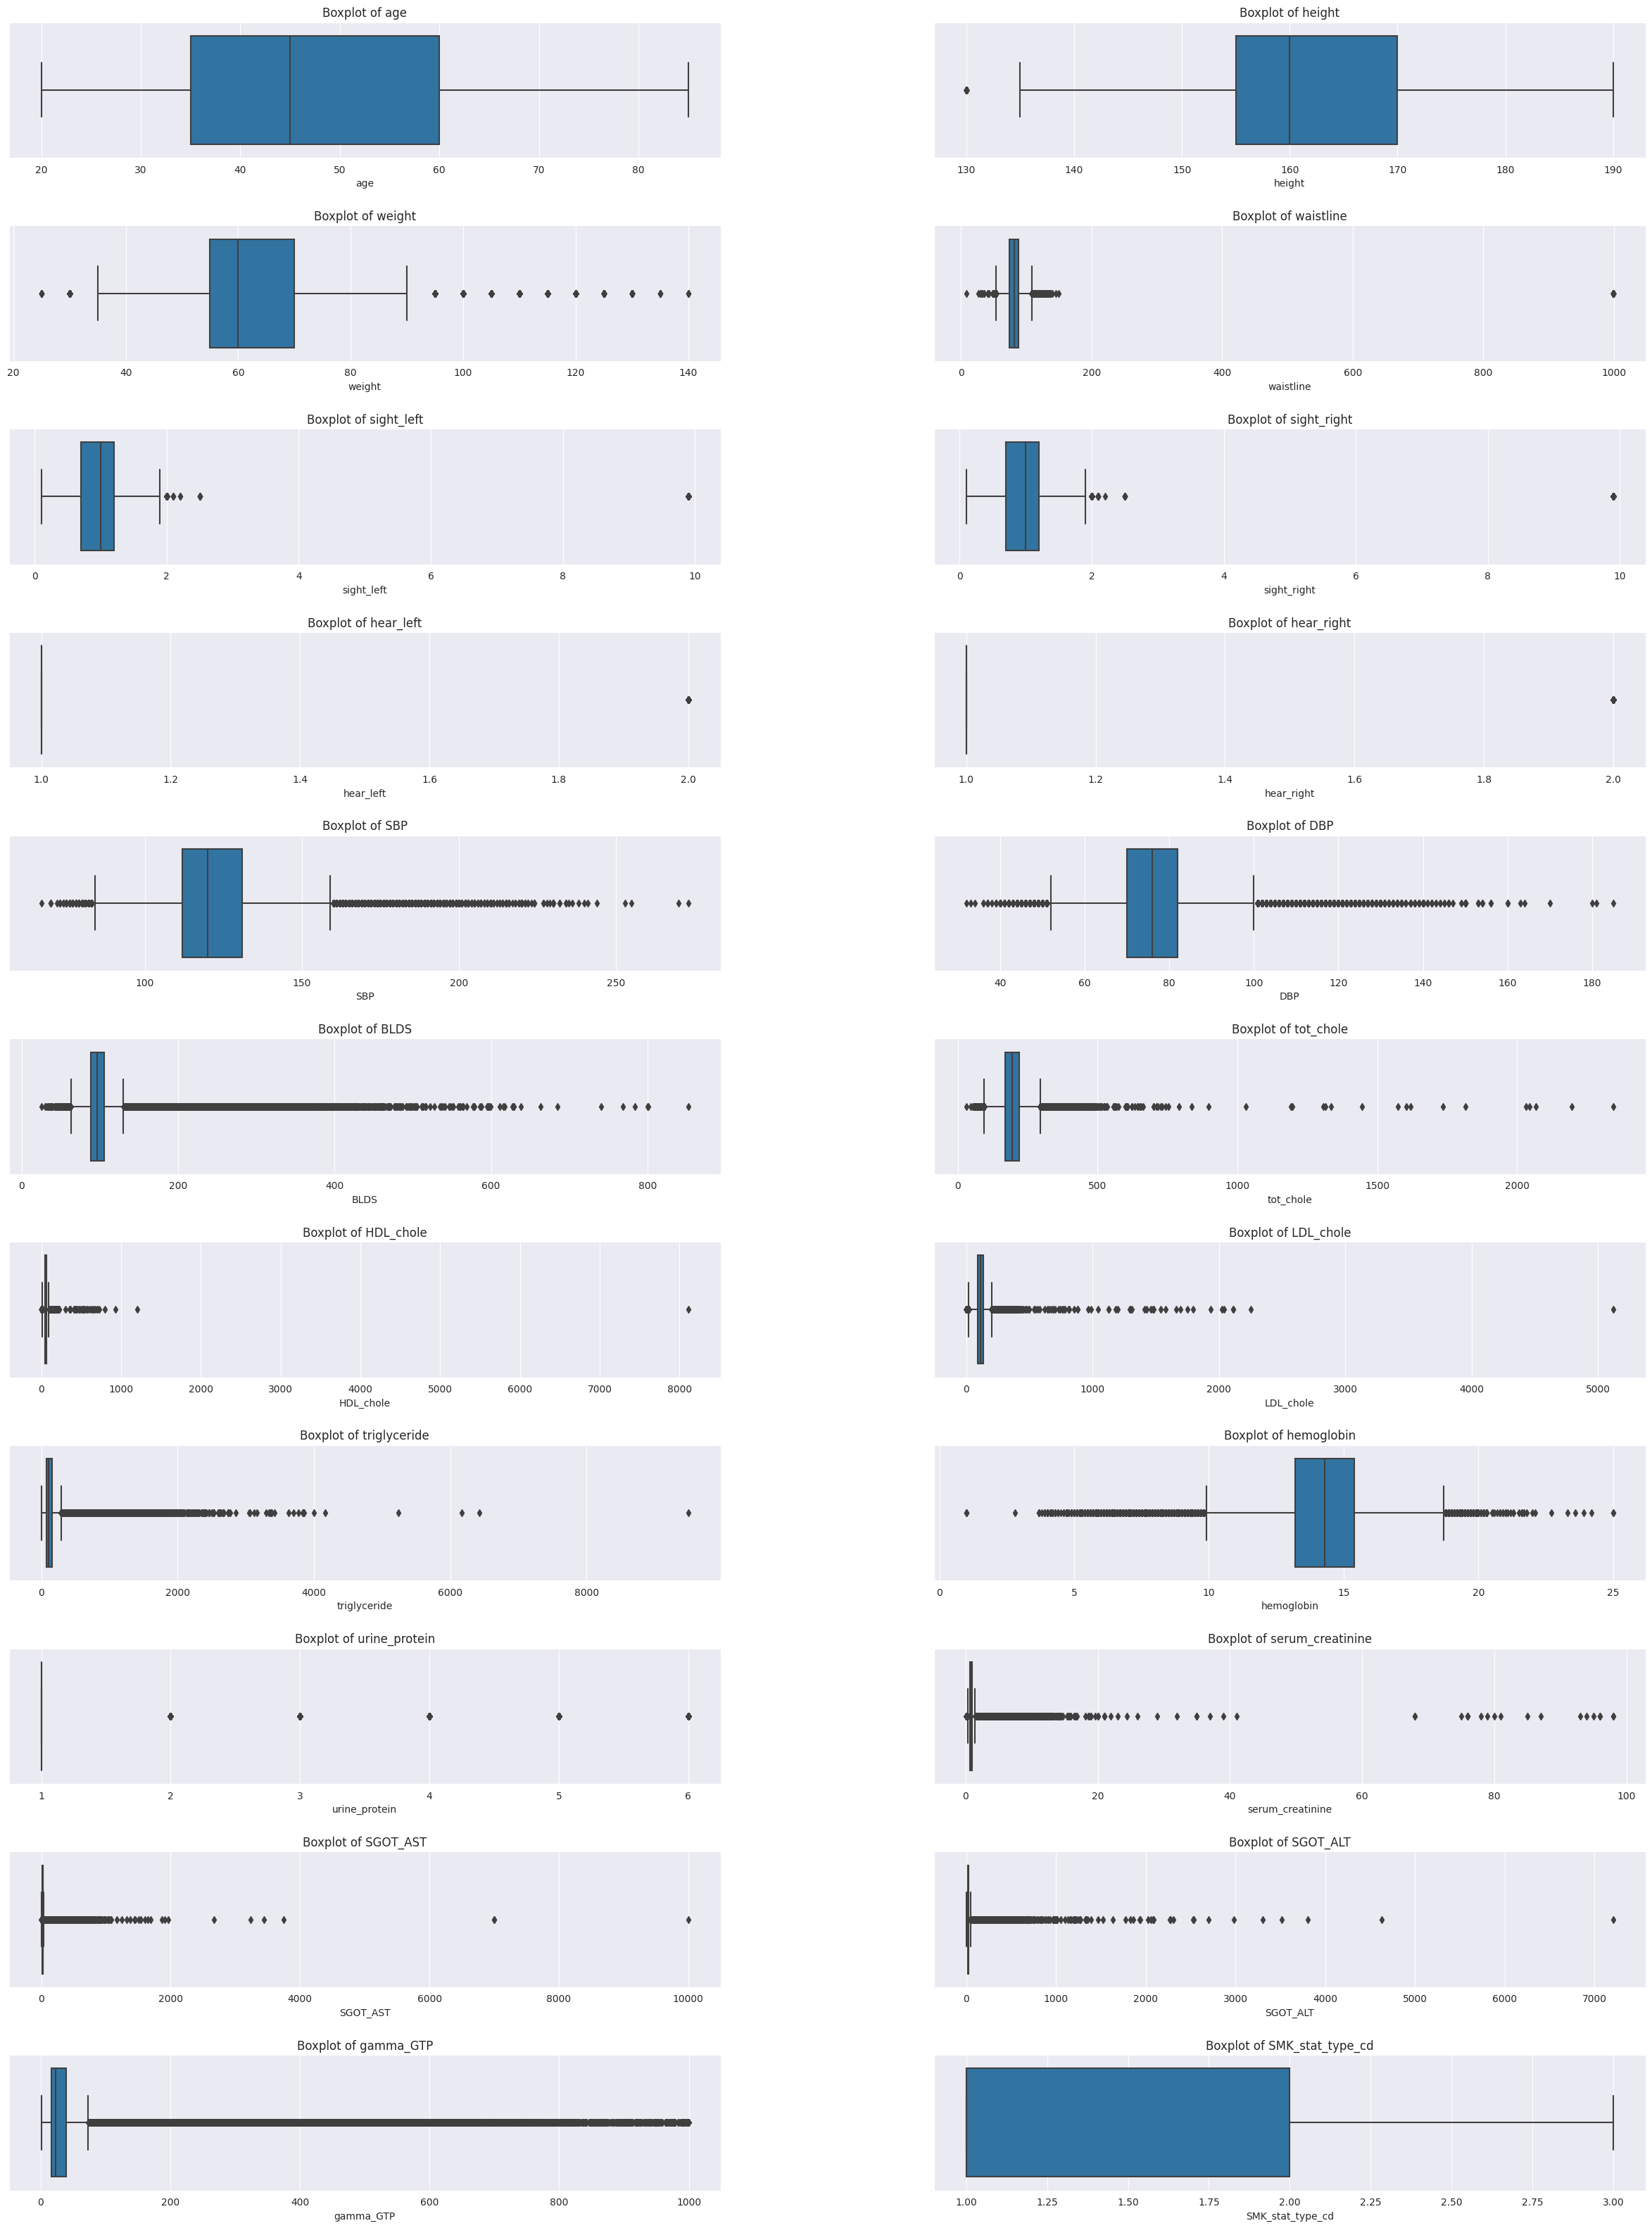

In [ ]:
def plot_boxplots(df):

    num_columns = df.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(30, 40))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

plt.tight_layout()
plot_boxplots(df)

In [ ]:
def remove_outliers(df, columns, k=1.5):

    for column in columns:
        # Calculate the first and third quartiles
        q1 = df[column].quantile(0.25) # We find the 25 smallest values
        q3 = df[column].quantile(0.75) # We find the 25 largest values

        # Calculate the interquartile range (the difference between the largest and smallest values)
        iqr = q3 - q1

        #Replace values outside the range [q1 * qr, q3 + k * ir] with boundary values
        #clip -used to crop values
        #lower: minimum value for cropping. If the value of the element is less than lower, it is replaced by lower.
        #upper: maximum value for cropping. If the value of the element is greater than upper, it is replaced by upper.
        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

    return df

In [ ]:
remove_outliers(df,['waistline','SBP', 'DBP','BLDS','tot_chole','triglyceride','serum_creatinine','SGOT_AST', 'SGOT_ALT'],k=1.5)

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0             1.0         1.0  120.0  80.0   99.0      193.0       48.0   
1             1.0         1.0  130.0  82.0  106.0      228.0       55.0   
2             1.0         1.0  120.0  70.0   98.0      136.0       41.0   
3             1.0         1.0  145.0  87.0   95.0      201.0       76.0   
4             1.0         1.0  138.0  82.0  101.0      199.0       61.0   
...           ...         ...    ...   ...    ...        ...        ...   
991341        1.0         1.0  114.0  80.0   88.0      198.0       46.0   
991342        1.0         1.0  119.0  83.0   83.0      133.0       40.0   
991343        1.0         1.0  110.0  70.0   90.0      205.0       96.0   
991344        1.0         1.0  119.0  74.0   69.0      122.0       38.0   
991345        1.0         1.0  133.0  79.0   99.0      225.0       39.0   

        LDL_chole  triglyceride  hemoglobin  urine_protein  serum_creatinine  \
0           126.0          92.0        17.1            1.0               1.0   
1           148.0         121.0        15.8            1.0               0.9   
2            74.0         104.0        15.8            1.0               0.9   
3           104.0         106.0        17.6            1.0               1.1   
4           117.0         104.0        13.8            1.0               0.8   
...           ...           ...         ...            ...               ...   
991341      125.0         132.0        15.0            1.0               1.0   
991342       84.0          45.0        15.8            1.0               1.1   
991343       77.0         157.0        14.3            1.0               0.8   
991344       73.0          53.0        14.5            1.0               0.8   
991345      153.0         163.0        15.8            1.0               0.9   

        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN  
0           21.0      35.0       40.0               1.0      Y  
1           20.0      36.0       27.0               3.0      N  
2           41.5      32.0       68.0               1.0      N  
3           29.0      34.0       18.0               1.0      N  
4           19.0      12.0       25.0               1.0      N  
...          ...       ...        ...               ...    ...  
991341      26.0      36.0       27.0               1.0      N  
991342      14.0      17.0       15.0               1.0      N  
991343      30.0      27.0       17.0               3.0      Y  
991344      21.0      14.0       17.0               1.0      N  
991345      24.0      43.0       36.0               3.0      Y  

[991320 rows x 24 columns]

## VISUALIZATION

#### DRINKERS COUNT

Text(0.5, 1.0, 'Count of Categories in DRK_YN')

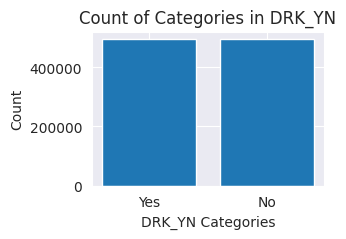

In [ ]:
counts = df['DRK_YN'].value_counts() # count the occurrences of unique values

plt.figure(figsize=(3, 2))  # Optional: Adjust the figure size
plt.bar(counts.index, counts.values)
plt.xlabel("DRK_YN Categories")
plt.xticks(counts.index, ["Yes", "No"])  # Specify tick positions and labels
plt.ylabel("Count")
plt.title("Count of Categories in DRK_YN")

### DRINKING VS AGE

<Axes: xlabel='height', ylabel='Count'>

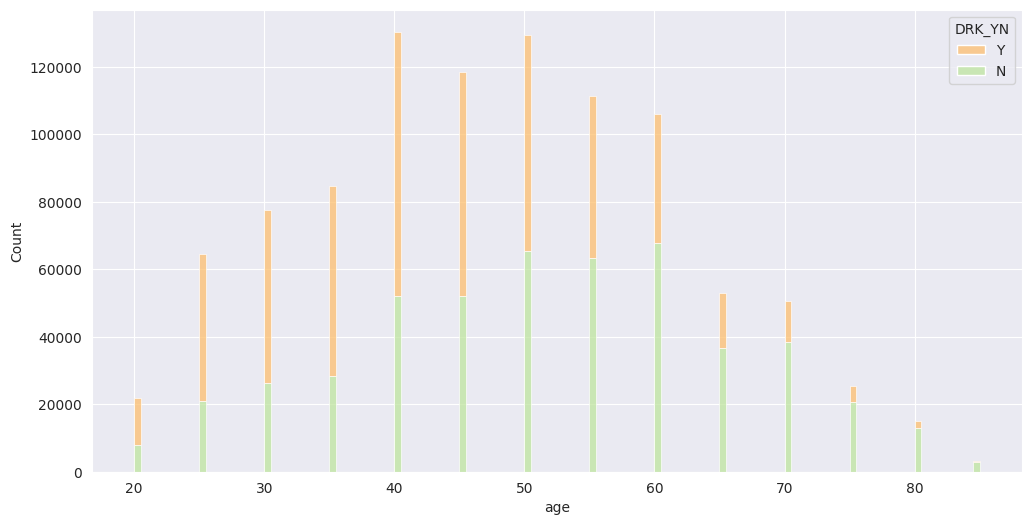

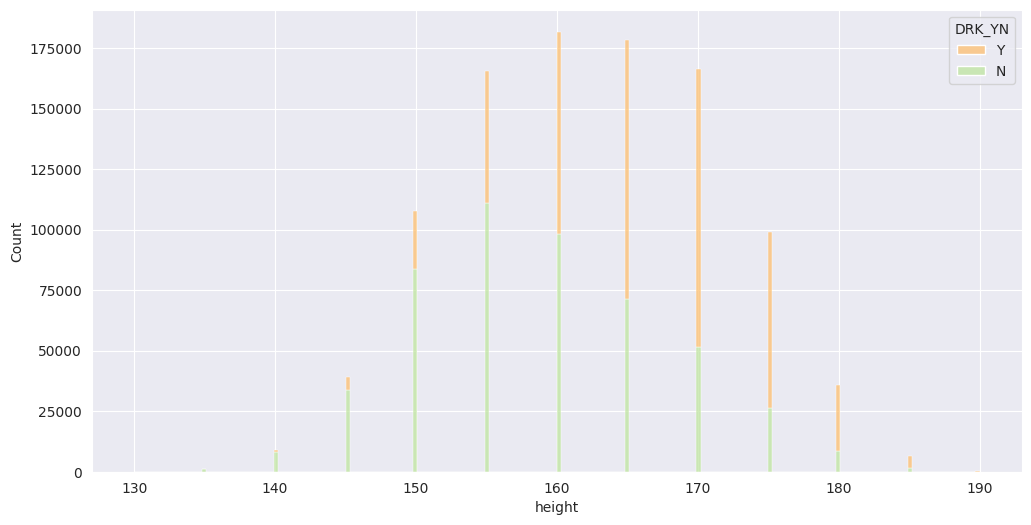

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='age',palette='Spectral',hue='DRK_YN',multiple='stack')
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='height',palette='Spectral',hue='DRK_YN',multiple='stack')

In [ ]:
df['Smoking_No_Quit_Yes'] = df['SMK_stat_type_cd'].replace([1,2,3], ['No', 'Quit', 'Yes'])


### Drinking Vs Sight & Hearing (physical condition)

<Axes: xlabel='sex', ylabel='hear_right'>

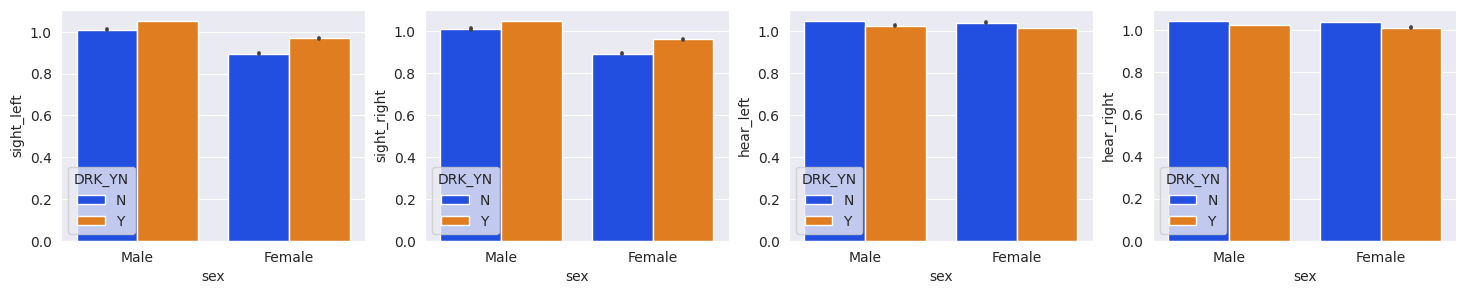

In [ ]:
plt.figure(figsize=(18,3))

plt.subplot(1, 4, 1)
sns.barplot(data=df, x= 'sex', y = 'sight_left', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])
plt.subplot(1, 4, 2)
sns.barplot(data=df, x= 'sex', y = 'sight_right', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])
plt.subplot(1, 4, 3)
sns.barplot(data=df, x= 'sex', y = 'hear_left', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])
plt.subplot(1, 4, 4)
sns.barplot(data=df, x= 'sex', y = 'hear_right', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])

### Drinking Vs Sight & Hearing according to age

<Axes: xlabel='age', ylabel='hear_right'>

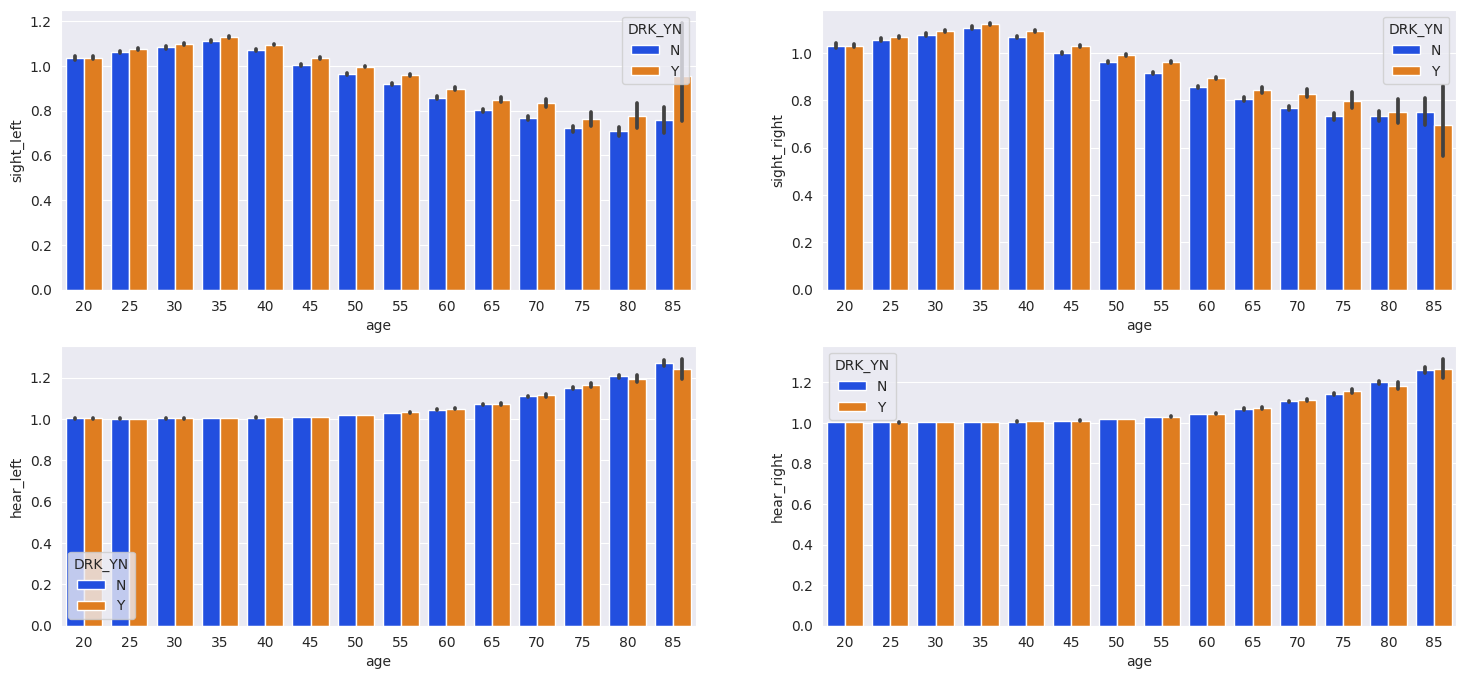

In [ ]:
plt.figure(figsize=(18,8))

plt.subplot(2, 2, 1)
sns.barplot(data=df, x= 'age', y = 'sight_left', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])
plt.subplot(2, 2, 2)
sns.barplot(data=df, x= 'age', y = 'sight_right', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])
plt.subplot(2, 2, 3)
sns.barplot(data=df, x= 'age', y = 'hear_left', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])
plt.subplot(2, 2, 4)
sns.barplot(data=df, x= 'age', y = 'hear_right', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])

### Drinking Vs Waistline

<Axes: xlabel='age', ylabel='waistline'>

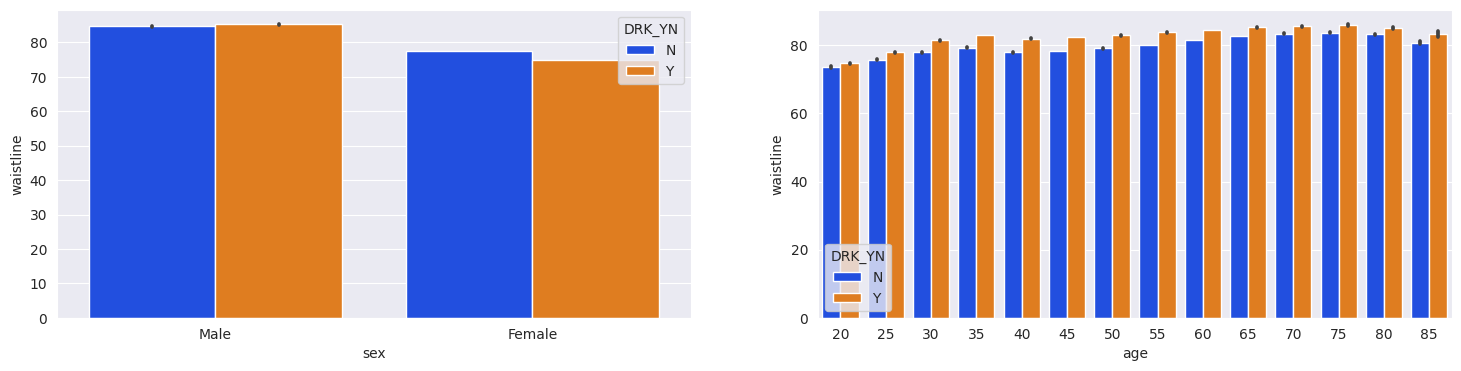

In [ ]:
plt.figure(figsize=(18,4))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x= 'sex', y = 'waistline', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])
plt.subplot(1, 2, 2)
sns.barplot(data=df, x= 'age', y = 'waistline', hue = "DRK_YN", palette = 'bright', hue_order=['N', 'Y'])

### Smoking according to Age

In [ ]:
df.head().T

0      1      2      3      4
sex                   Male   Male   Male   Male   Male
age                     35     30     40     50     50
height                 170    180    165    175    165
weight                  75     80     75     80     60
waistline             90.0   89.0   91.0   91.0   80.0
sight_left             1.0    0.9    1.2    1.5    1.0
sight_right            1.0    1.2    1.5    1.2    1.2
hear_left              1.0    1.0    1.0    1.0    1.0
hear_right             1.0    1.0    1.0    1.0    1.0
SBP                  120.0  130.0  120.0  145.0  138.0
DBP                   80.0   82.0   70.0   87.0   82.0
BLDS                  99.0  106.0   98.0   95.0  101.0
tot_chole            193.0  228.0  136.0  201.0  199.0
HDL_chole             48.0   55.0   41.0   76.0   61.0
LDL_chole            126.0  148.0   74.0  104.0  117.0
triglyceride          92.0  121.0  104.0  106.0  104.0
hemoglobin            17.1   15.8   15.8   17.6   13.8
urine_protein          1.0    1.0    1.0    1.0    1.0
serum_creatinine       1.0    0.9    0.9    1.1    0.8
SGOT_AST              21.0   20.0   41.5   29.0   19.0
SGOT_ALT              35.0   36.0   32.0   34.0   12.0
gamma_GTP             40.0   27.0   68.0   18.0   25.0
SMK_stat_type_cd       1.0    3.0    1.0    1.0    1.0
DRK_YN                   Y      N      N      N      N
Smoking_No_Quit_Yes     No    Yes     No     No     No

In [ ]:
Smoking_Age = df.groupby(['age', 'Smoking_No_Quit_Yes'], as_index=False).agg(n = ('age', 'count'))
Smoking_Age.head()

age Smoking_No_Quit_Yes      n
0   20                  No  15333
1   20                Quit   1228
2   20                 Yes   5409
3   25                  No  42800
4   25                Quit   5100

<Axes: xlabel='age', ylabel='n'>

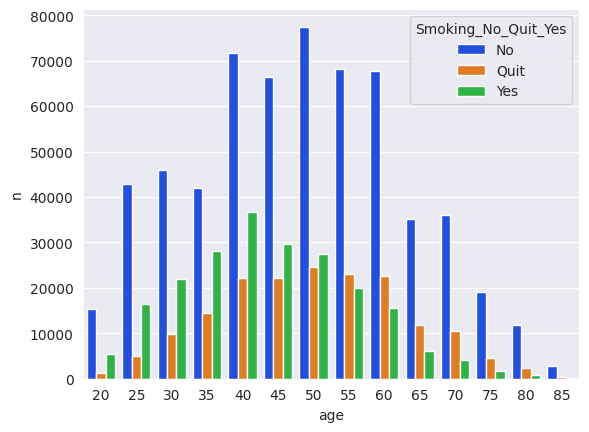

In [ ]:
sns.barplot(data=Smoking_Age, x= 'age', y = 'n', hue = "Smoking_No_Quit_Yes", palette = 'bright',
            hue_order=['No', 'Quit', 'Yes'])

### Smoking Vs Sight & Hearing

In [ ]:
df["Smoking_No_Quit_Yes"] = df['SMK_stat_type_cd'].replace([1.0, 2.0, 3.0], ['No', 'Quit', 'Yes'])
df["Smoking_No_Quit_Yes"].value_counts()

No      602431
Yes     213945
Quit    174944
Name: Smoking_No_Quit_Yes, dtype: int64

<Axes: xlabel='sex', ylabel='hear_right'>

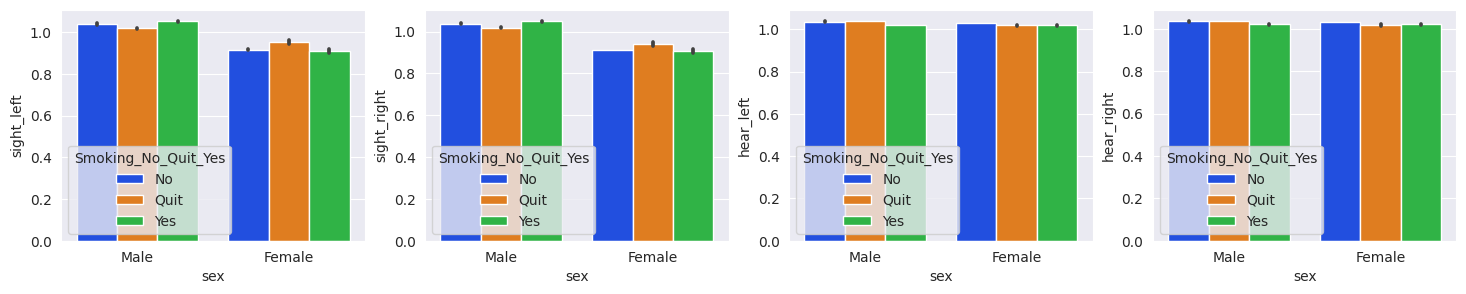

In [ ]:
plt.figure(figsize=(18, 3))

plt.subplot(1, 4, 1)
sns.barplot(data=df, x= 'sex', y = 'sight_left', hue = "Smoking_No_Quit_Yes", palette = 'bright',
            hue_order=['No', 'Quit', 'Yes'])
plt.subplot(1, 4, 2)
sns.barplot(data=df, x= 'sex', y = 'sight_right', hue = "Smoking_No_Quit_Yes", palette = 'bright',
            hue_order=['No', 'Quit', 'Yes'])
plt.subplot(1, 4, 3)
sns.barplot(data=df, x= 'sex', y = 'hear_left', hue = "Smoking_No_Quit_Yes", palette = 'bright',
            hue_order=['No', 'Quit', 'Yes'])
plt.subplot(1, 4, 4)
sns.barplot(data=df, x= 'sex', y = 'hear_right', hue = "Smoking_No_Quit_Yes", palette = 'bright',
            hue_order=['No', 'Quit', 'Yes'])

<Axes: xlabel='age', ylabel='hear_right'>

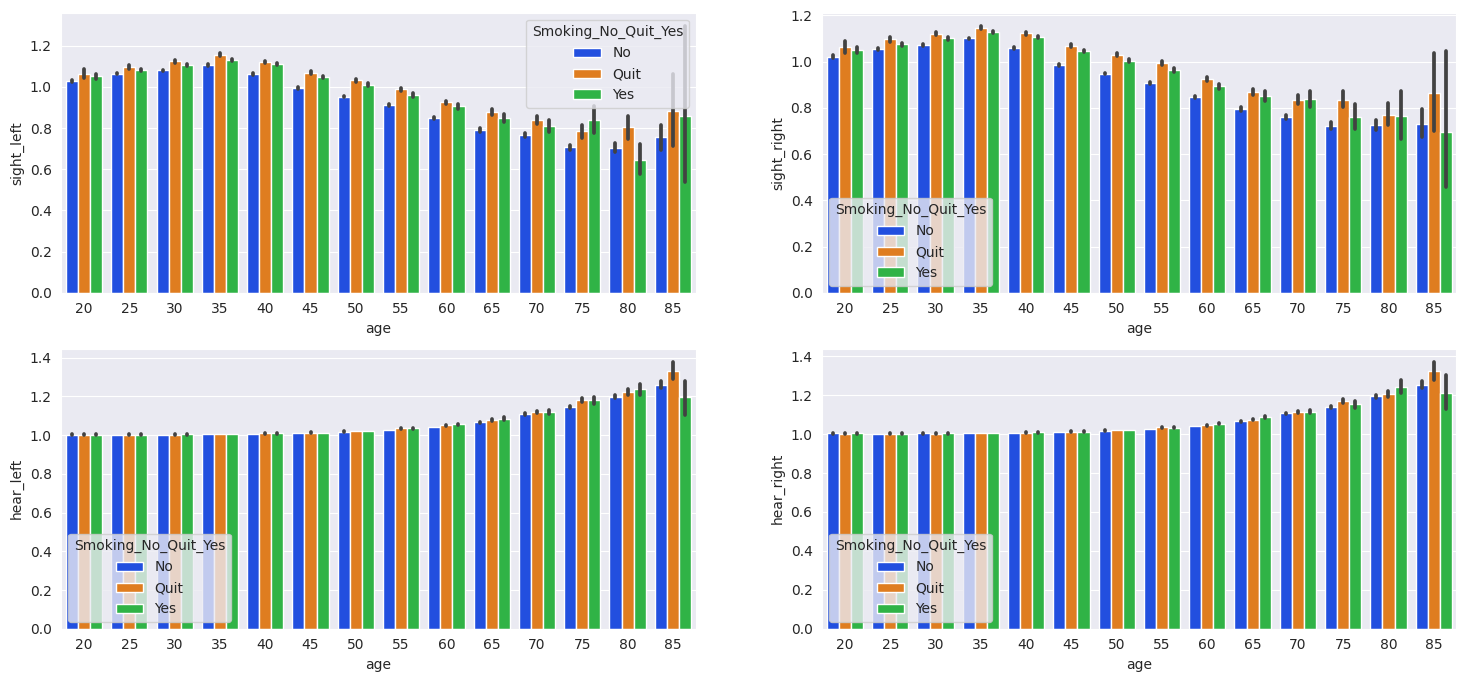

In [ ]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 2, 1)
sns.barplot(data=df, x= 'age', y = 'sight_left', hue = "Smoking_No_Quit_Yes", palette = 'bright',
            hue_order=['No', 'Quit', 'Yes'])
plt.subplot(2, 2, 2)
sns.barplot(data=df, x= 'age', y = 'sight_right', hue = "Smoking_No_Quit_Yes", palette = 'bright',
            hue_order=['No', 'Quit', 'Yes'])
plt.subplot(2, 2, 3)
sns.barplot(data=df, x= 'age', y = 'hear_left', hue = "Smoking_No_Quit_Yes", palette = 'bright',
            hue_order=['No', 'Quit', 'Yes'])
plt.subplot(2, 2, 4)
sns.barplot(data=df, x= 'age', y = 'hear_right', hue = "Smoking_No_Quit_Yes", palette = 'bright',
            hue_order=['No', 'Quit', 'Yes'])

### smoking Vs waistline

<Axes: xlabel='age', ylabel='waistline'>

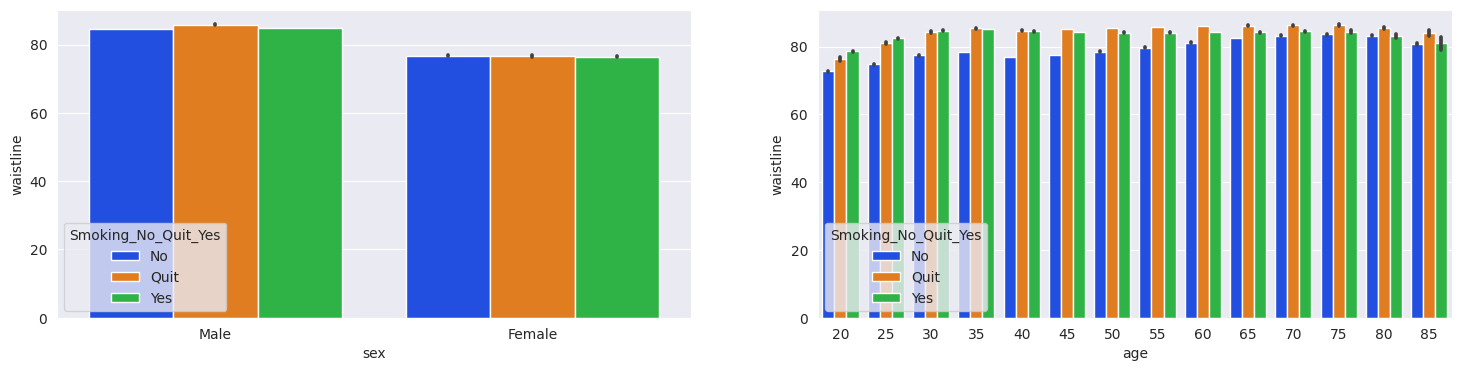

In [ ]:
plt.figure(figsize=(18,4))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x= 'sex', y = 'waistline', hue = "Smoking_No_Quit_Yes", palette = 'bright', hue_order=['No', 'Quit', 'Yes'])
plt.subplot(1, 2, 2)
sns.barplot(data=df, x= 'age', y = 'waistline', hue = "Smoking_No_Quit_Yes", palette = 'bright', hue_order=['No', 'Quit', 'Yes'])

Text(0.5, 1.0, 'Drinking')

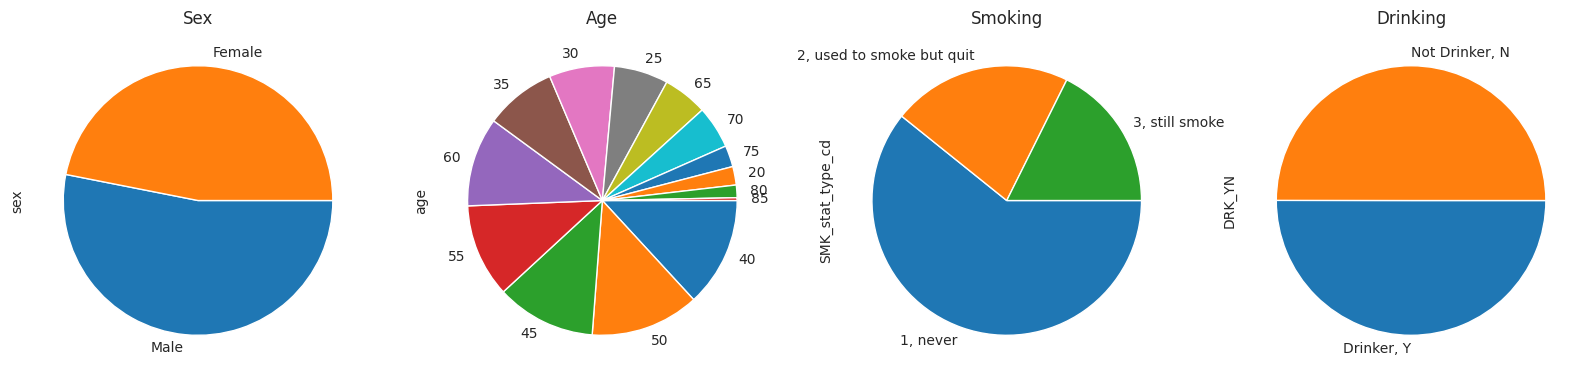

In [ ]:
# EDA
# Data Distribution

plt.figure(figsize=(20,20))

plt.subplot(1, 4, 1)
df['sex'].value_counts().plot.pie(counterclock=False)
plt.title('Sex')

plt.subplot(1, 4, 2)
df['age'].value_counts().plot.pie(counterclock=False)
plt.title('Age')

plt.subplot(1, 4, 3)
labels = ['1, never', '2, used to smoke but quit', '3, still smoke']
df['SMK_stat_type_cd'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Smoking')

plt.subplot(1, 4, 4)
labels = ['Drinker, Y', 'Not Drinker, N']
df['DRK_YN'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Drinking')

### pairplot - Drinking Vs Blood index

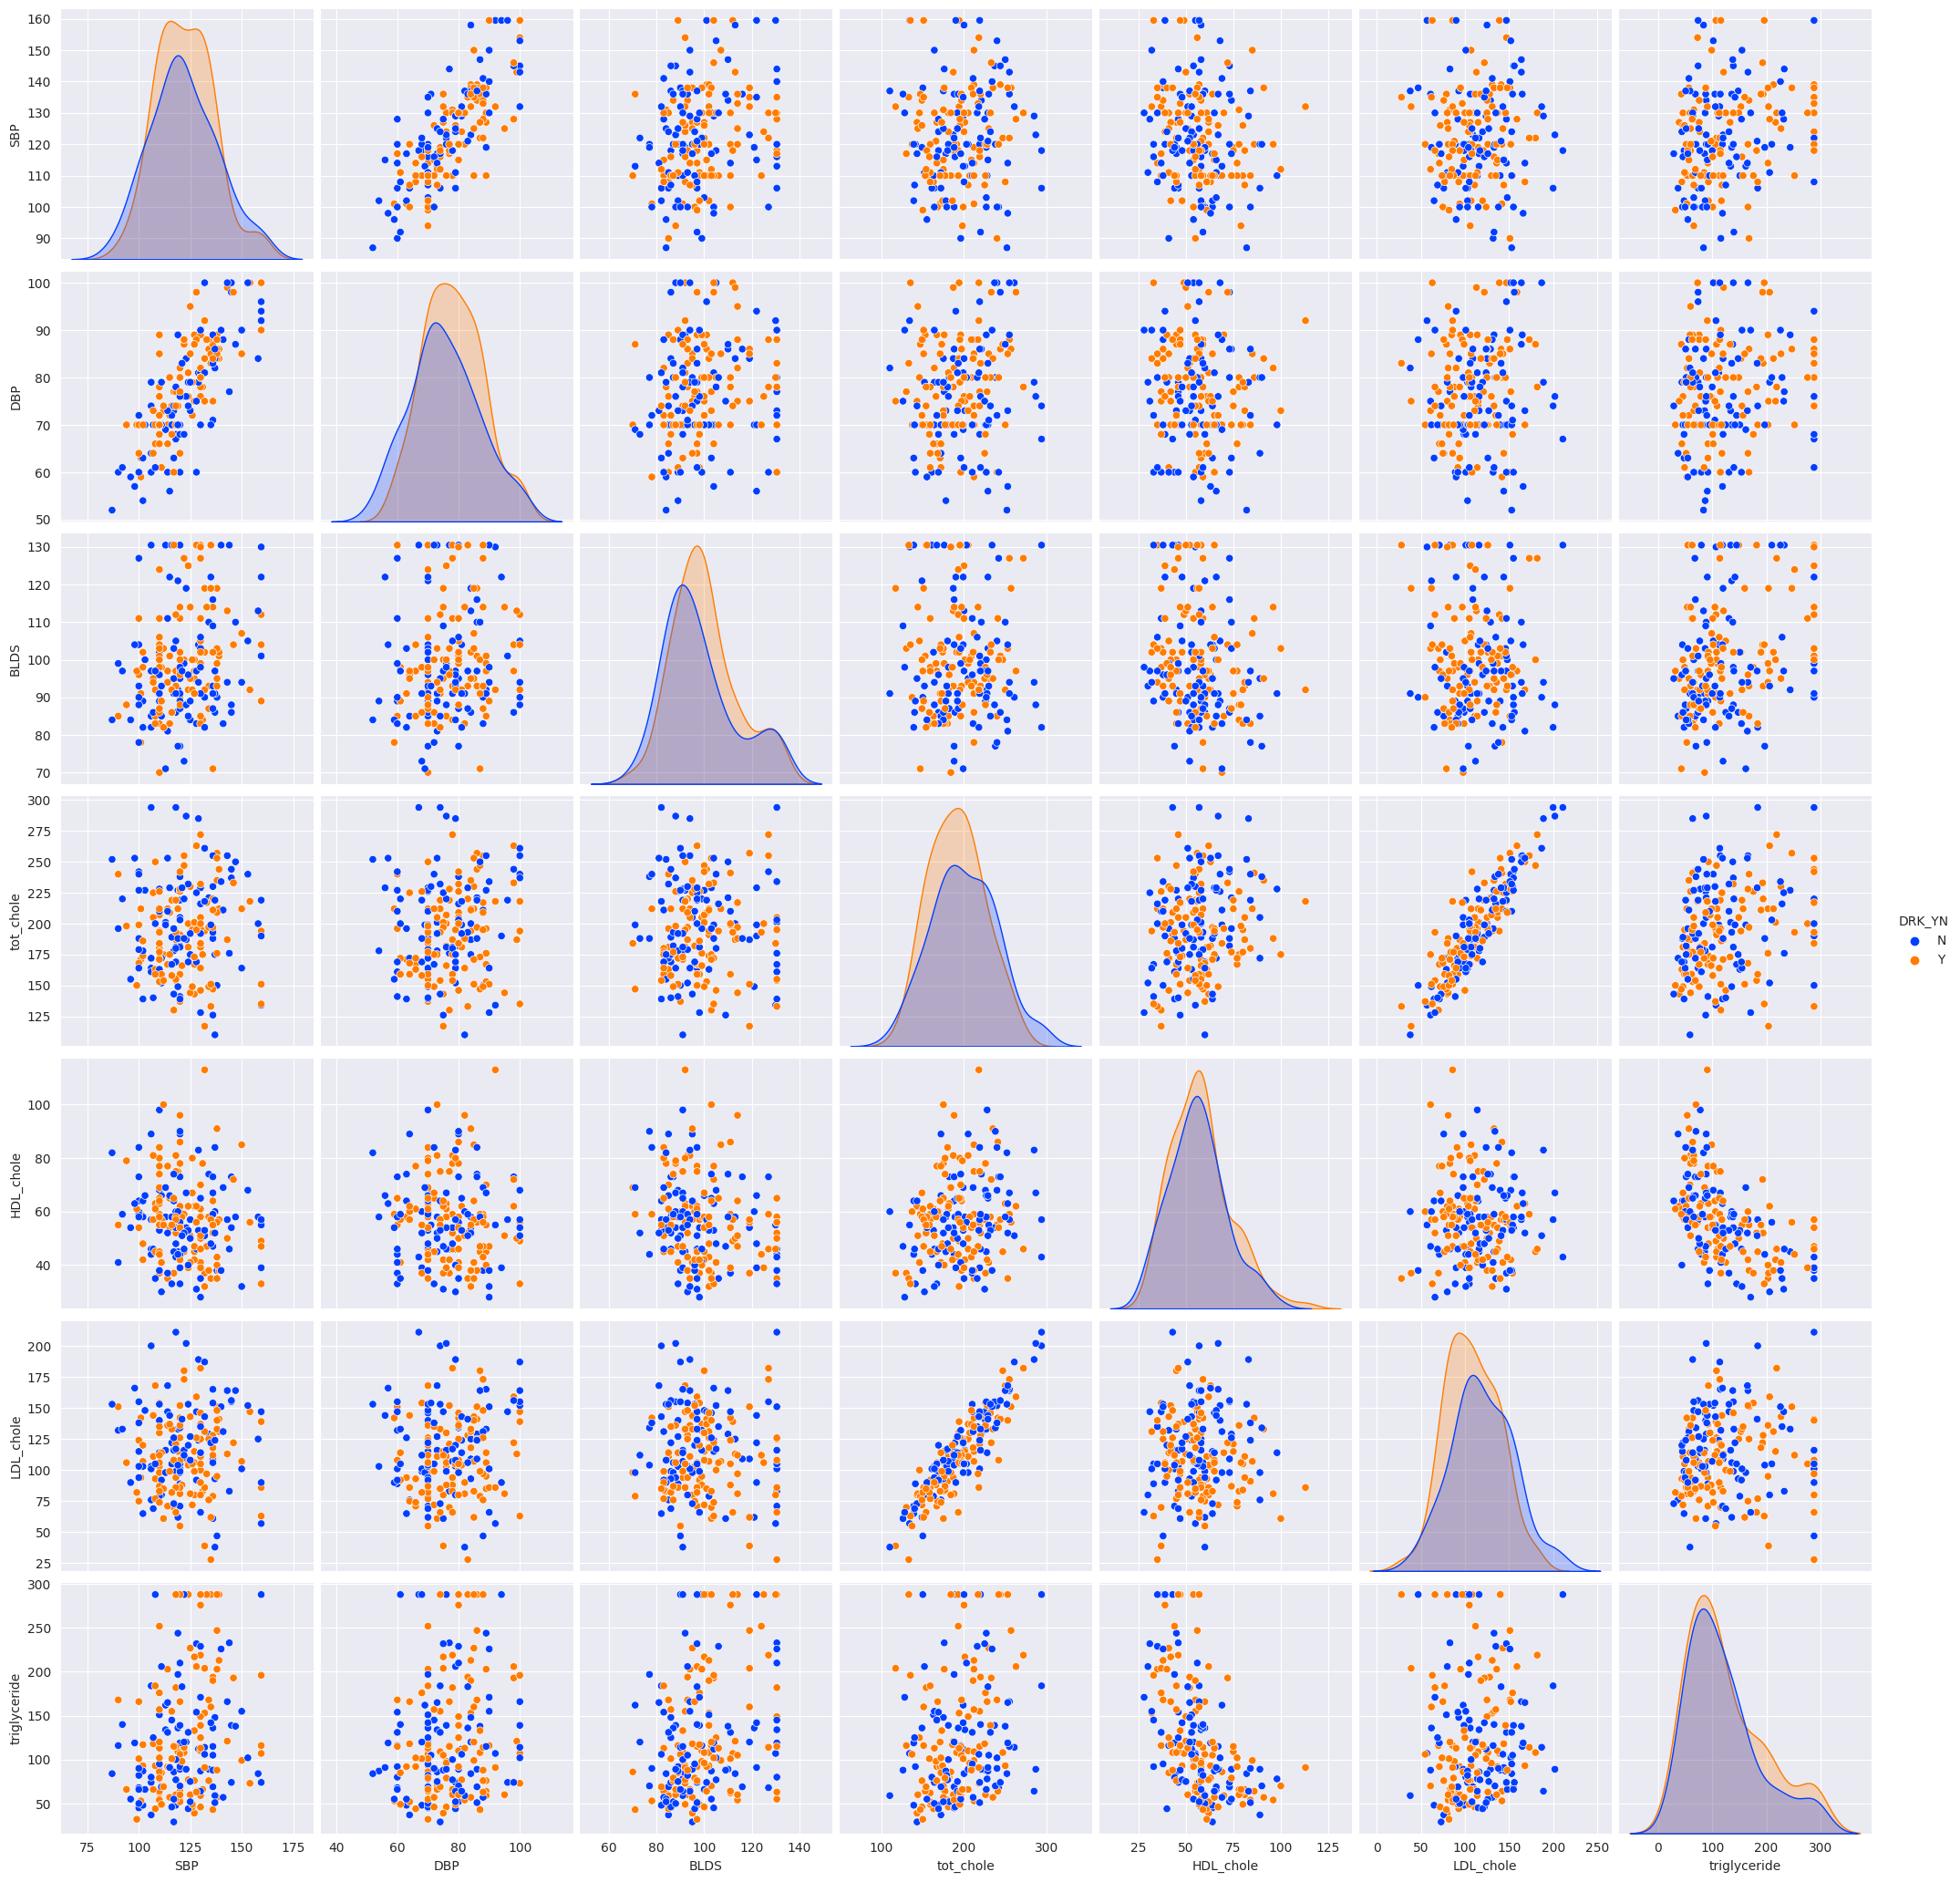

In [ ]:
# sampling Drinking and Blood Index, 1st half

body_sample = df.sample(200)
body_Drinking_1h = body_sample[['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'DRK_YN']]

sns.pairplot(body_Drinking_1h, hue = "DRK_YN", size = 3, palette = 'bright')

# Drinking No N, Yes Y

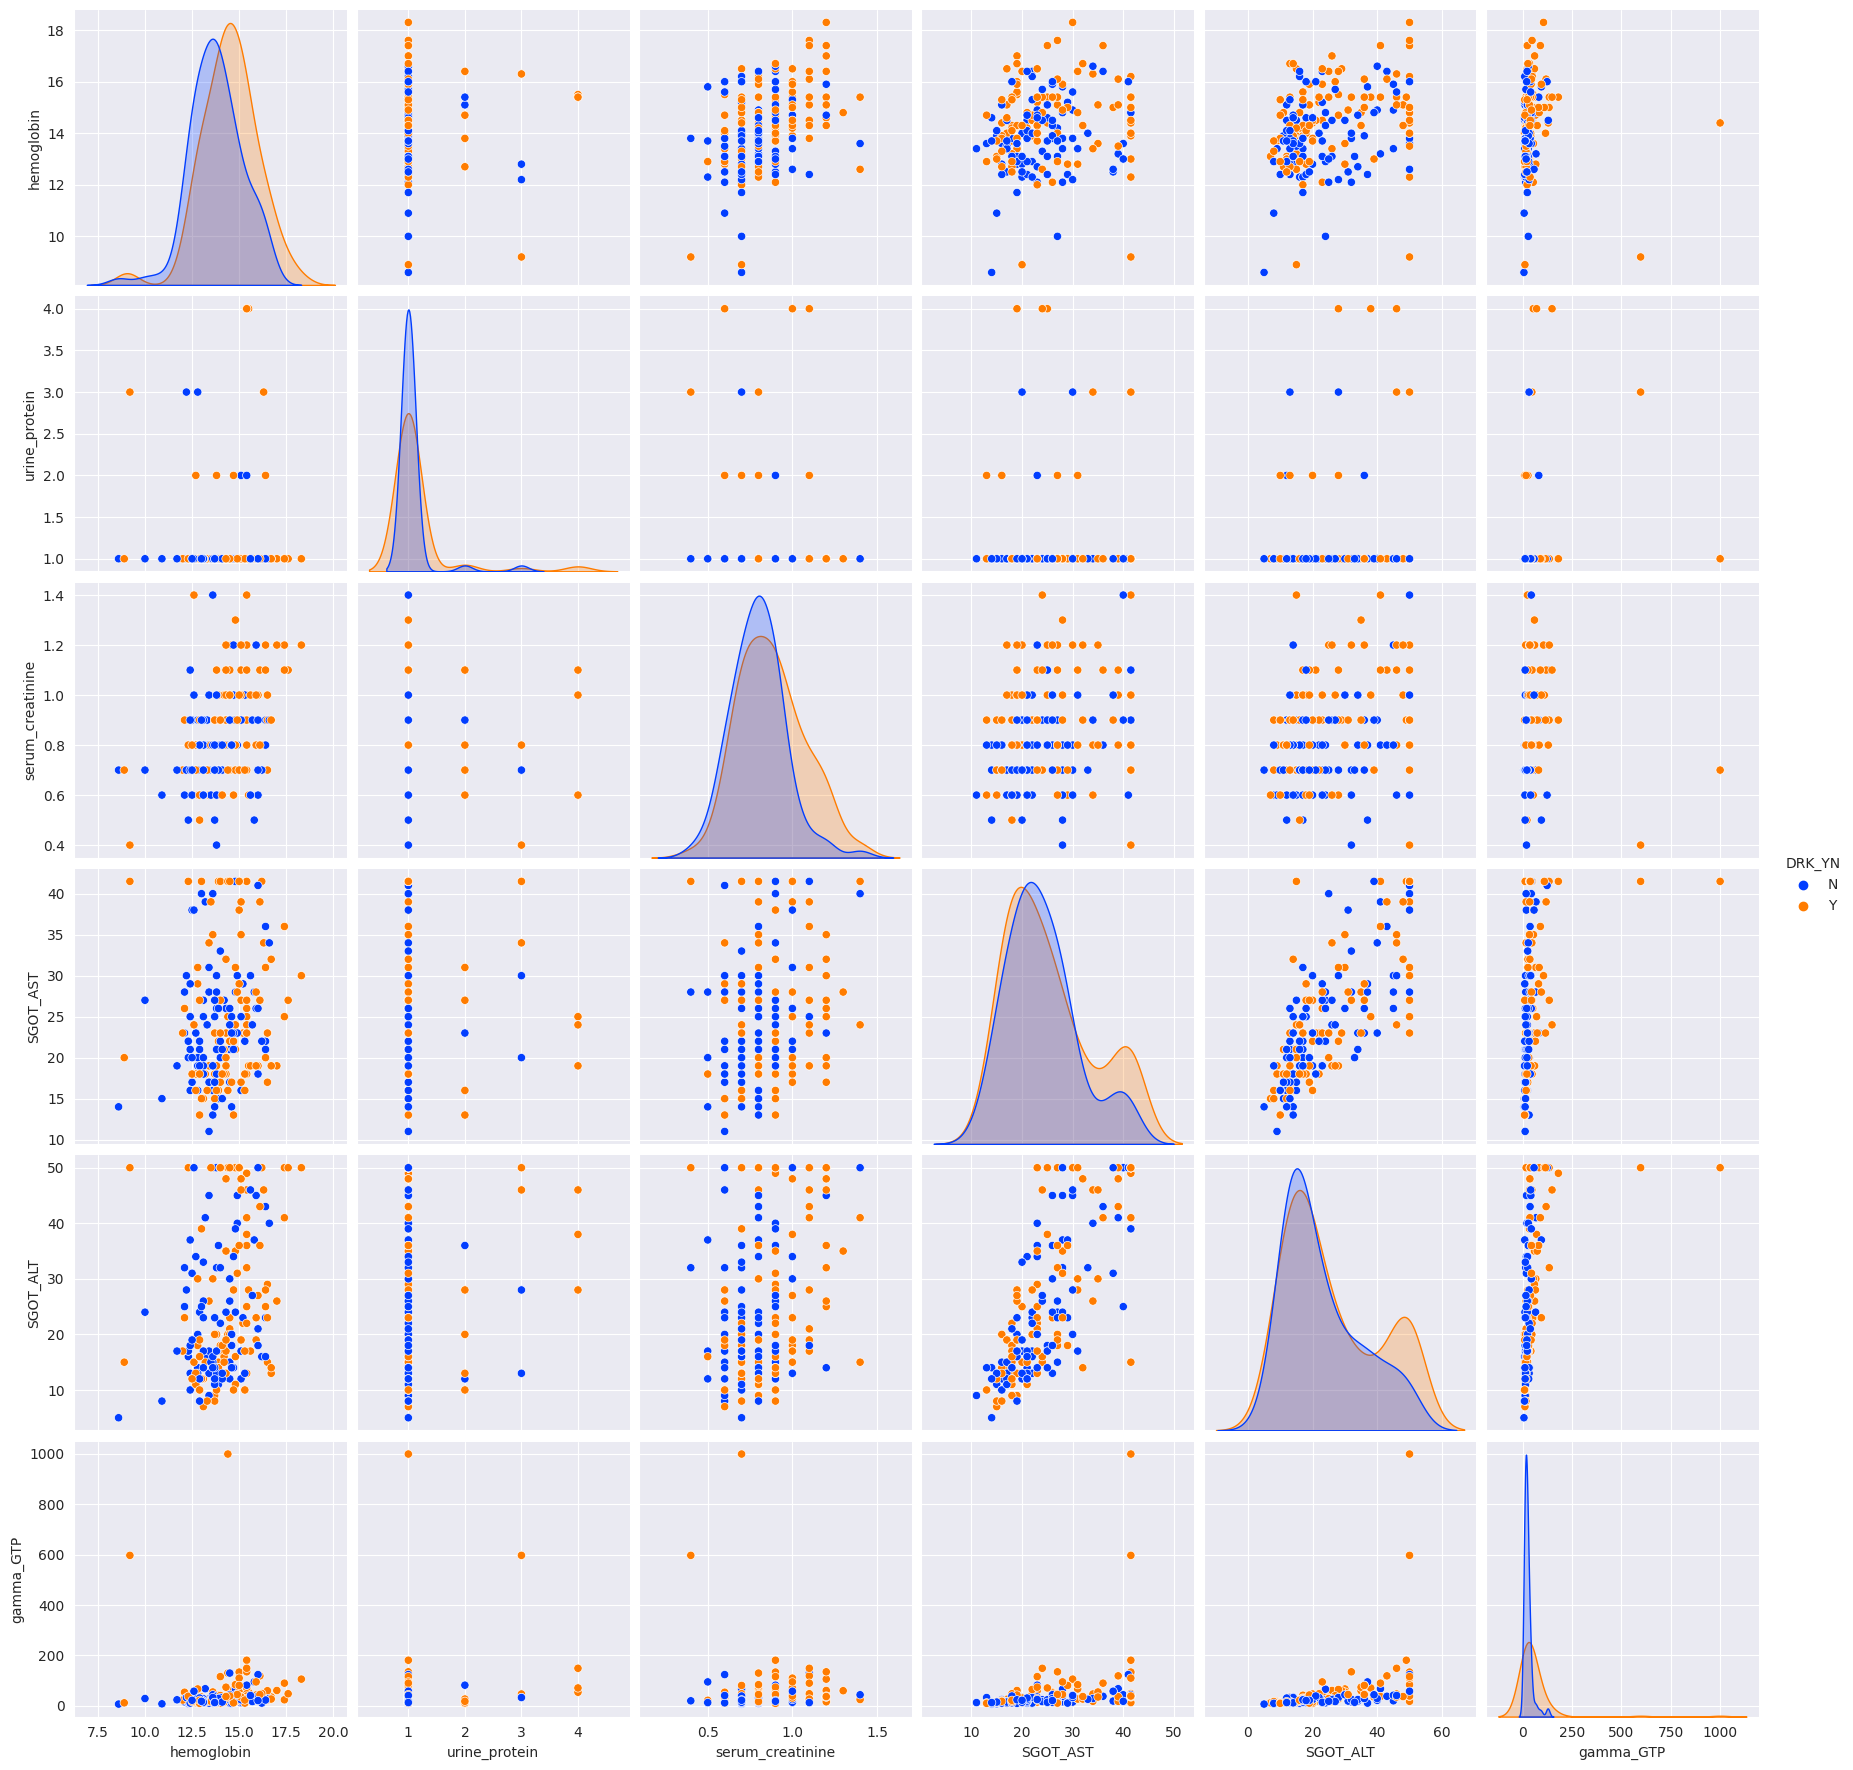

In [ ]:
# sampling Drinking and Blood Index, 2nd half

body_Drinking_2h = body_sample[['hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN']]

sns.pairplot(body_Drinking_2h, hue = "DRK_YN", size = 3, palette = 'bright')

# Drinking No N, Yes Y

### pairplot - Smoking Vs Blood index

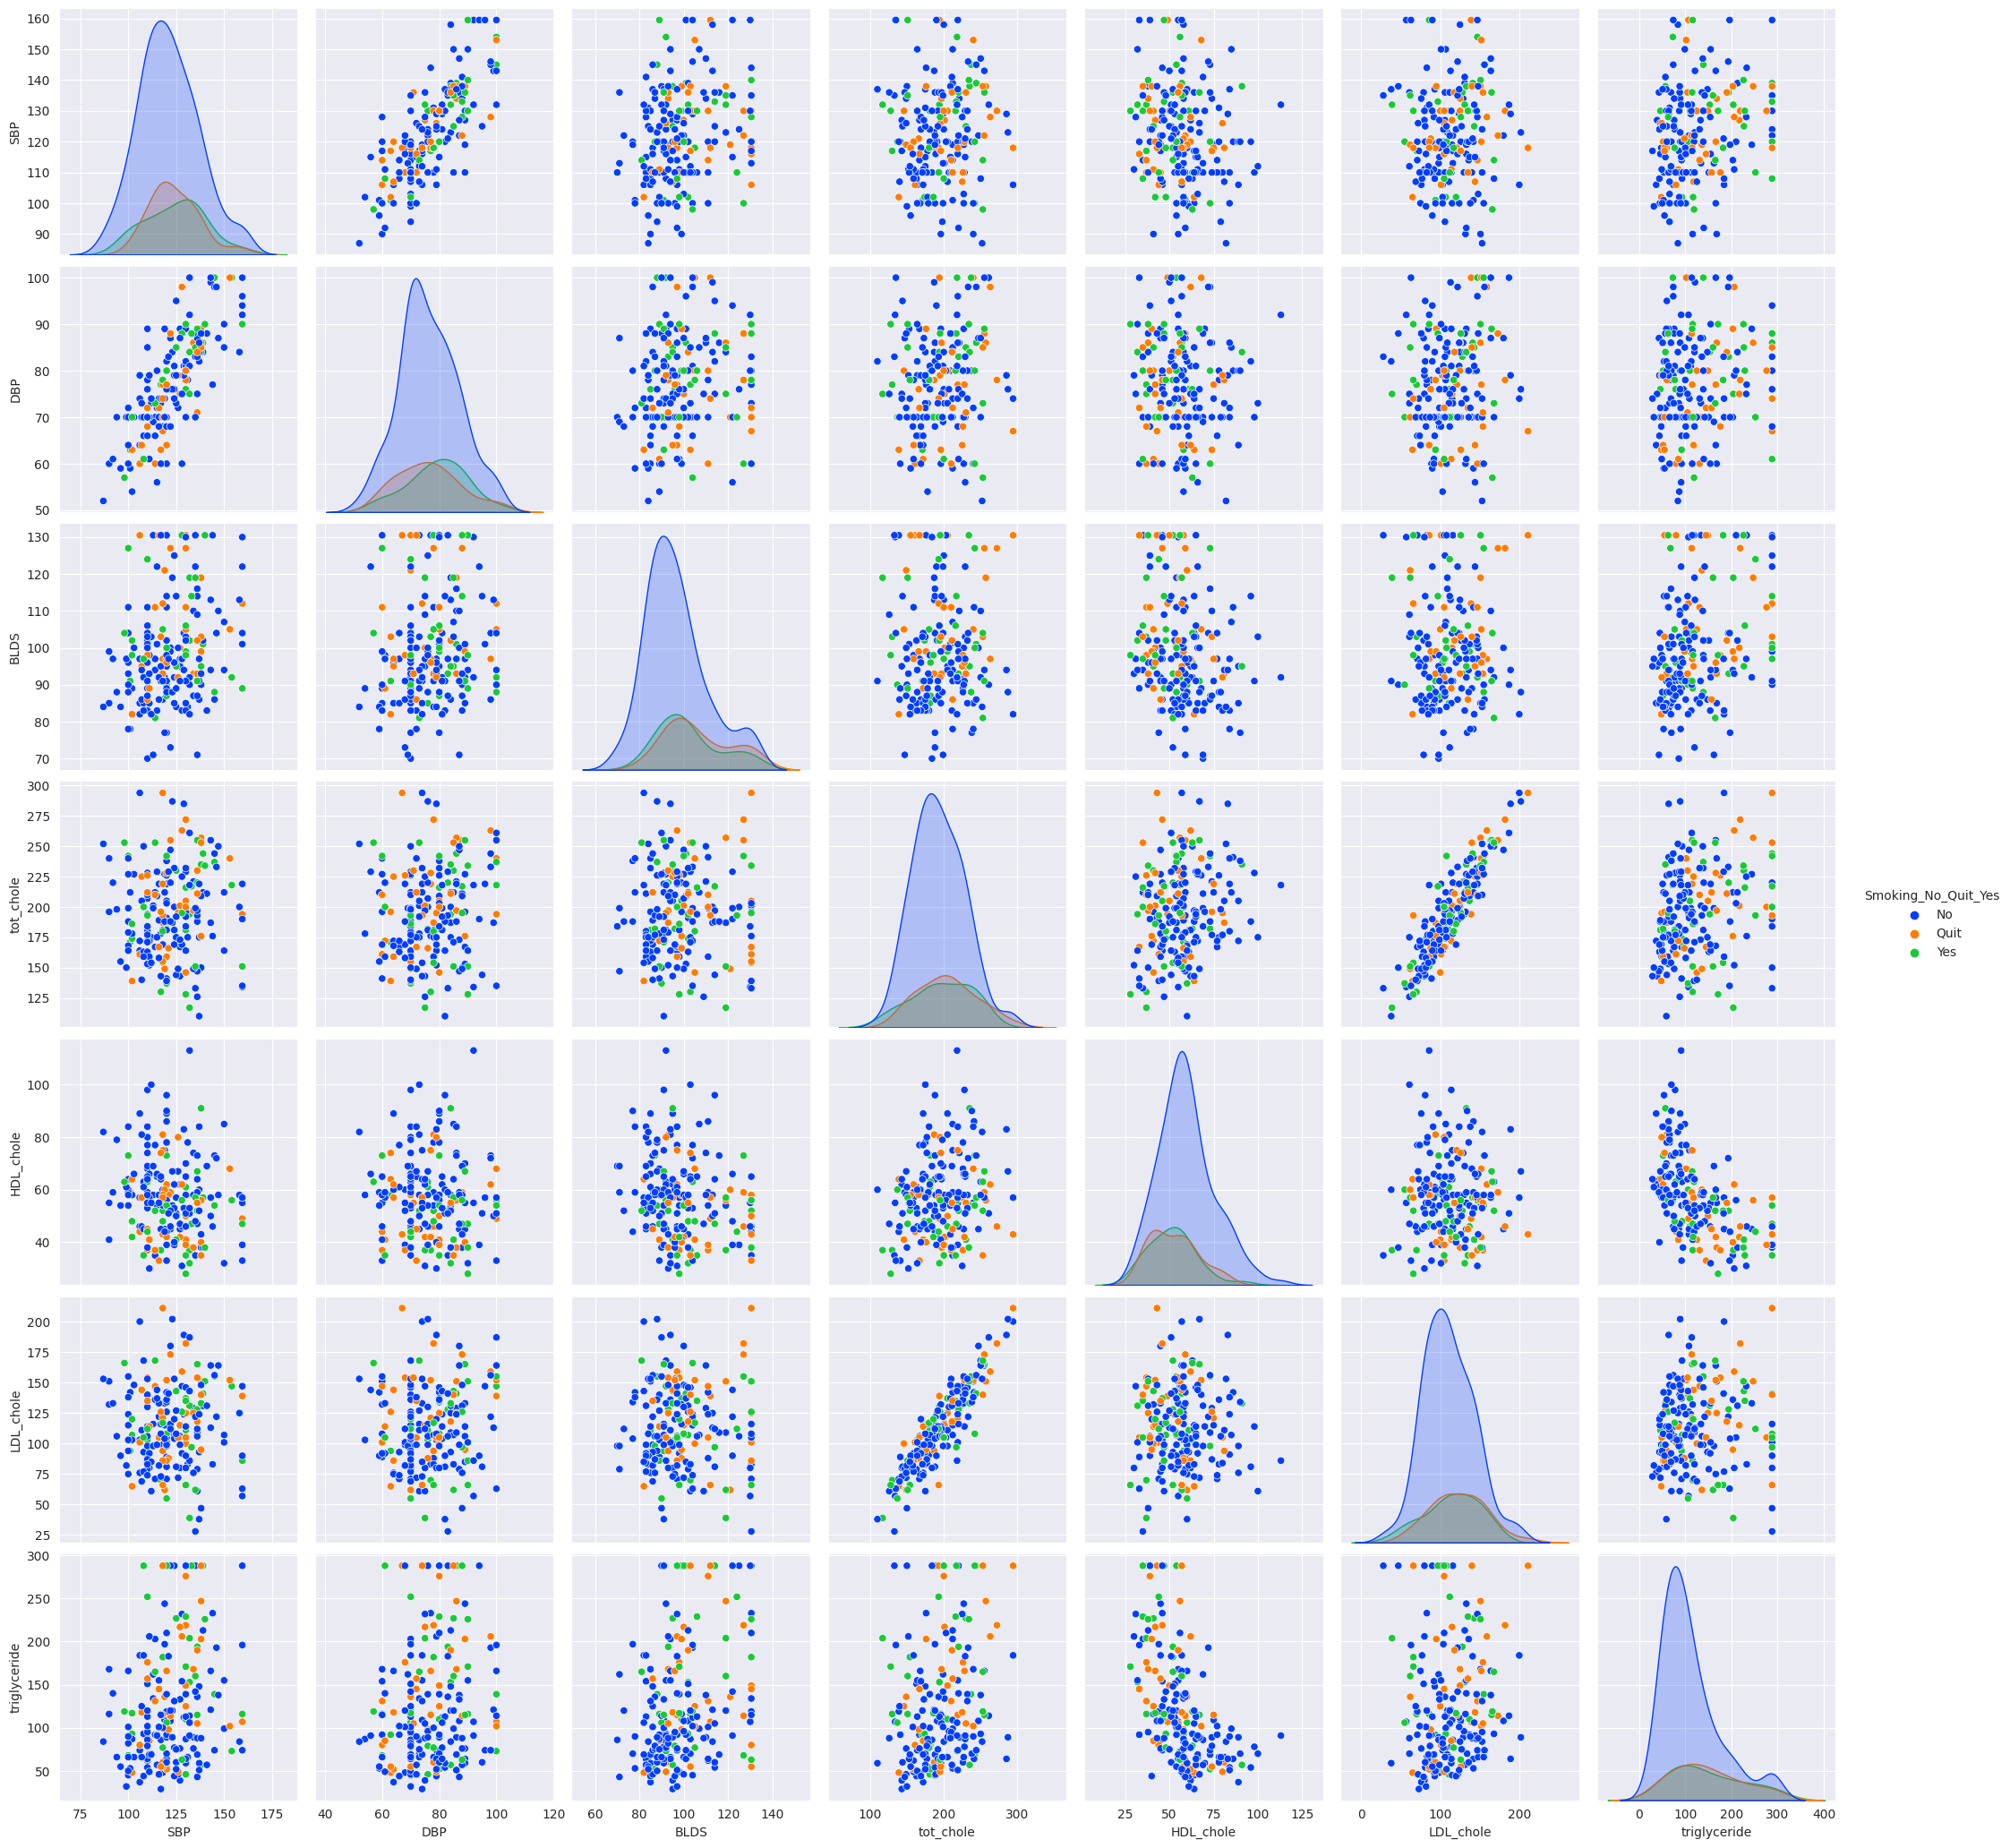

In [ ]:
# sampling Smoking and Blood Index, 1st half

body_Smoking_1h = body_sample[['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'Smoking_No_Quit_Yes']]

sns.pairplot(body_Smoking_1h, hue = "Smoking_No_Quit_Yes", size = 3, palette = 'bright')

# Smoking No, Quit, Yes

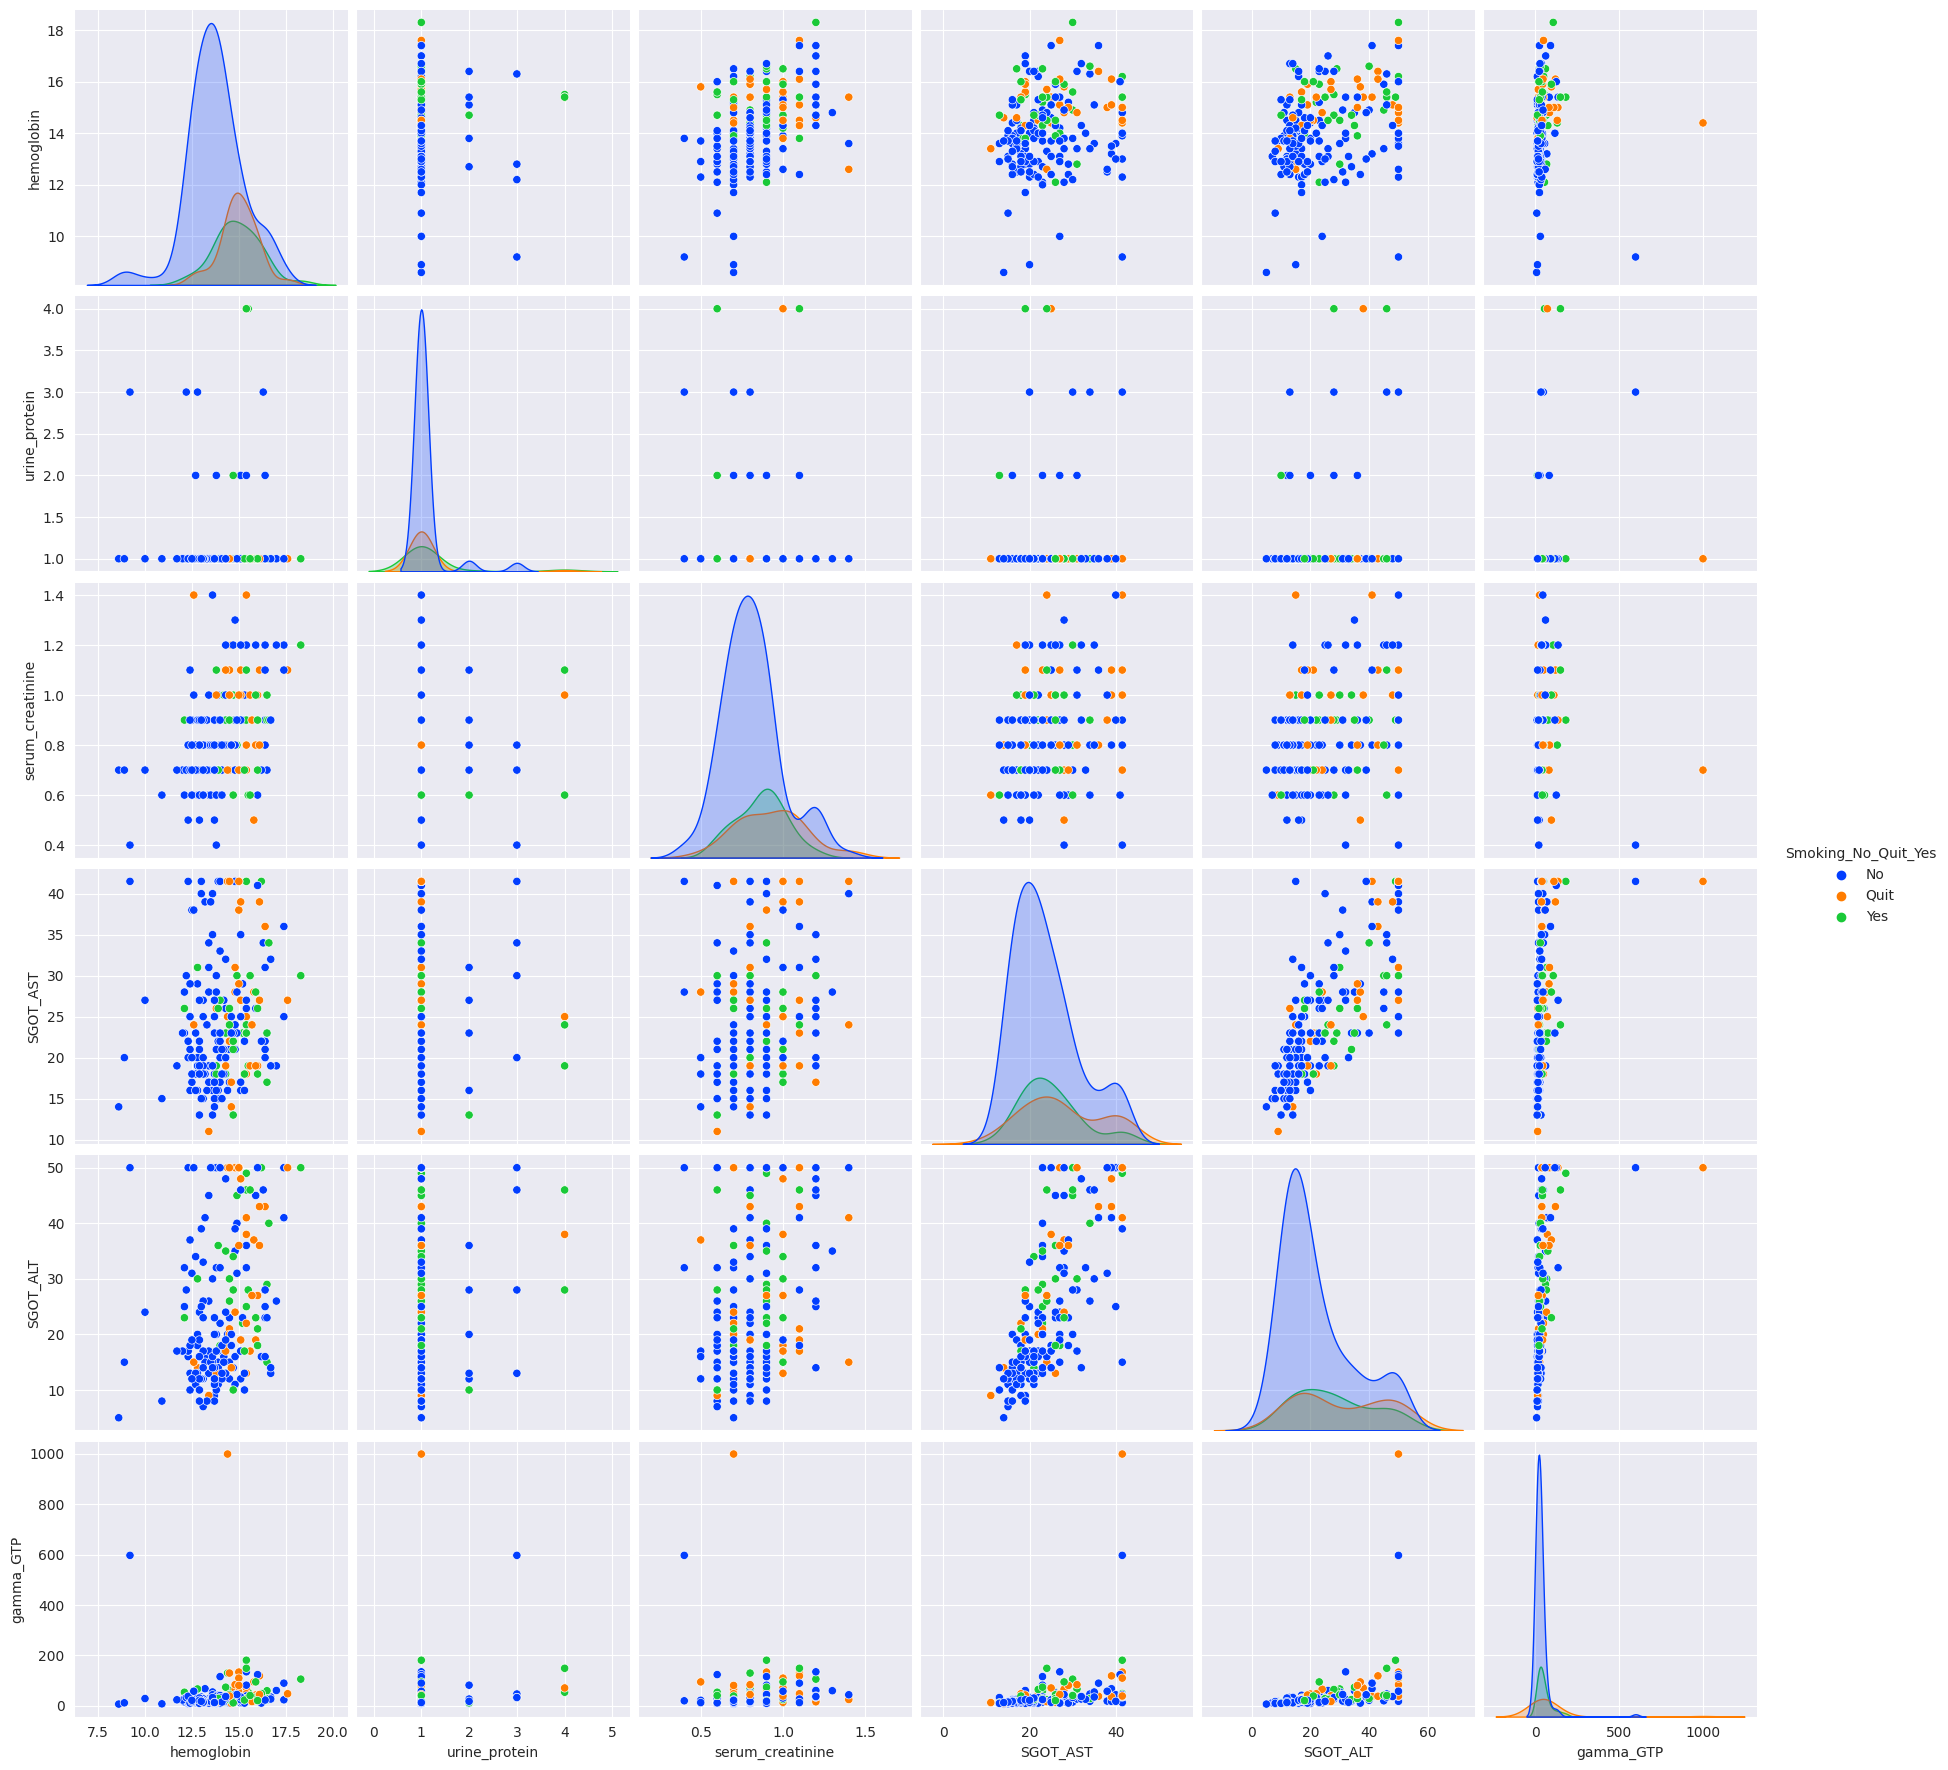

In [ ]:
# sampling Smoking and Blood Index, 2nd half

body_Smoking_1h = body_sample[['hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'Smoking_No_Quit_Yes']]

sns.pairplot(body_Smoking_1h, hue = "Smoking_No_Quit_Yes", size = 3, palette = 'bright')

# Smoking No, Quit, Yes

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

And now let's take a look at the heat map :

In [ ]:
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})
# I'm changing the Y and N to 1 and 0 in order to show up on the corelation map


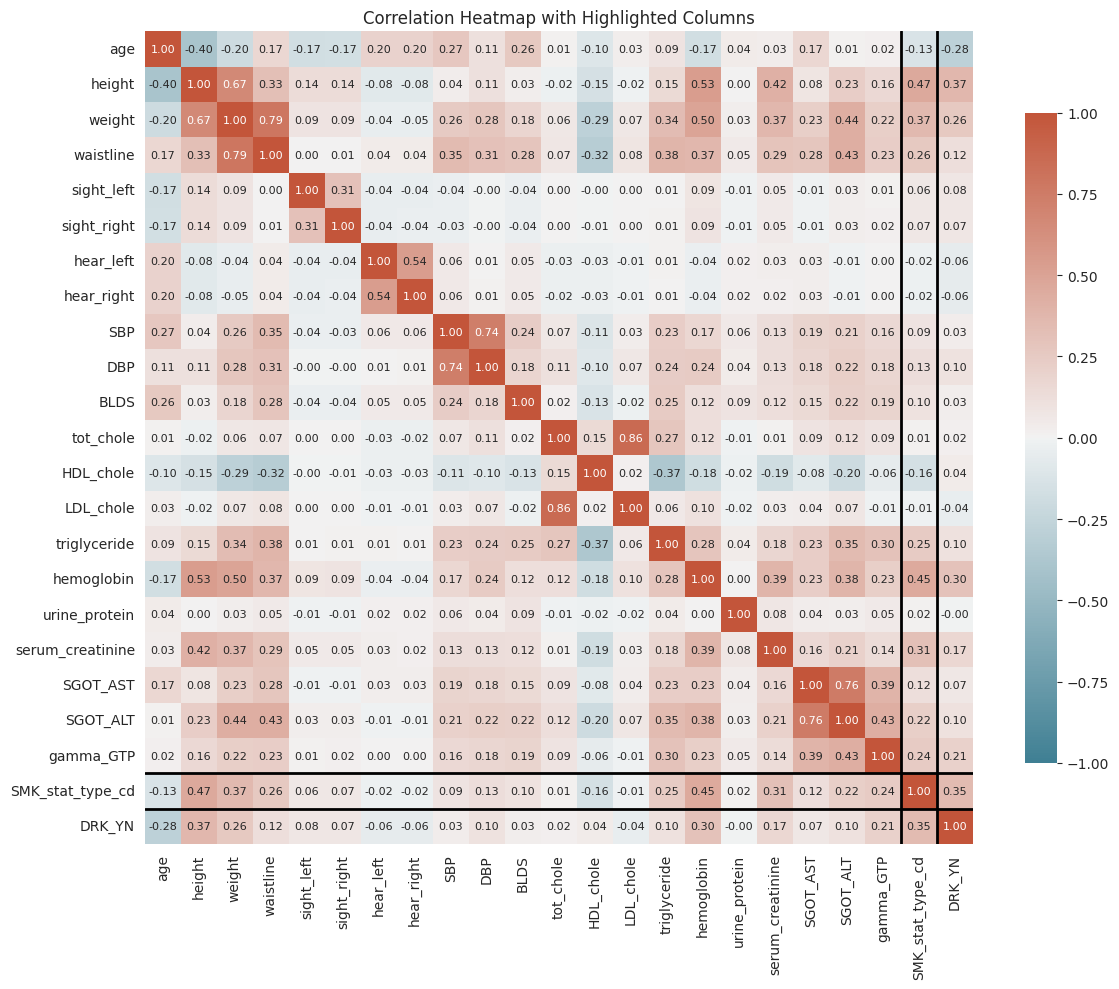

In [ ]:
correlation_matrix = df.corr()


# Specify columns to highlight
highlight_cols = ['DRK_YN', 'SMK_stat_type_cd']

# Create a larger heatmap with adjusted font size
plt.figure(figsize=(12, 10))

# Define custom color palette for the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with custom colors for highlighted columns
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f", annot_kws={"size": 8},
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

# Highlight columns by drawing lines around them
for i in range(len(correlation_matrix.columns)):
    if correlation_matrix.columns[i] in highlight_cols:
        plt.axhline(i, color='k', linewidth=2)
        plt.axvline(i, color='k', linewidth=2)

plt.title('Correlation Heatmap with Highlighted Columns')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

I've highlithed the areas of study on purpose to see what's going on with this correlation after that i would be extracting correlation columns where the correlation is above 0.1 and below -0.1 for the drinkers and the smokers

There are some highly correlated columns depending upon an individual's gender.
1. height is highly correlated to weight.
2. waistline is highly correlated to weight.
3. Systolic Blood Pressures is highly correlated to Diastolic Blood Pressure.
4. LDL Cholestoral is highly correlated to total cholestoral.
5. SGOT_AST is highly related with SGOT_ALT.

In [ ]:
correlation_threshold = 0.1
DRK_features = []
for feature in correlation_matrix.columns:
    if feature != 'DRK_YN' and (correlation_matrix[feature]['DRK_YN'] > correlation_threshold or
                                correlation_matrix[feature]['DRK_YN'] < -correlation_threshold):
        DRK_features.append(feature)

print("Correlated features with 'DRK_YN':")
print(DRK_features)

Correlated features with 'DRK_YN':
['age', 'height', 'weight', 'waistline', 'DBP', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']


In [ ]:
correlation_threshold = 0.1
SMK_features = []
for feature in correlation_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (correlation_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                correlation_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with 'SMK_stat_type_cd':")
print(SMK_features)

Correlated features with 'SMK_stat_type_cd':
['age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN']


In [ ]:
# Select the features and target variable
X = df[DRK_features]
y = df['DRK_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000, fit_intercept=False)  # Set fit_intercept=False
model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7144262195860065


In [ ]:
# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7211495783399912


In [ ]:
# Select the features and target variable


from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb_model = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gb_model)
cm_gb_dr_model = confusion_matrix(y_test,y_pred_gb_model)
print("Accuracy:", accuracy)
print("confusion matrix:", cm_gb_dr_model)

Accuracy: 0.7254771415889925
confusion matrix: [[70716 28796]
 [25632 73120]]


<Axes: >

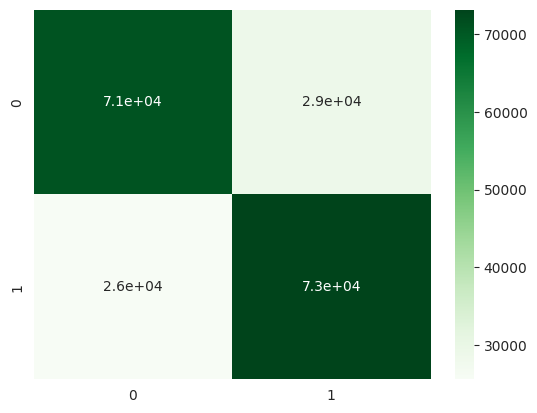

In [ ]:
sns.heatmap(cm_gb_dr_model,cmap="Greens",annot=True)

## SMOKING MODEL

In [ ]:
# Select the features and target variable
X = df[SMK_features]
y = df['SMK_stat_type_cd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6943822378243151


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000, fit_intercept=False)  # Set fit_intercept=False
model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6665002219263204


In [ ]:
# # Select the features and target variable
# X = df[SMK_features]
# y = df['SMK_stat_type_cd']
# # Split the data into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from sklearn.ensemble import GradientBoostingClassifier
# gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# gb_model.fit(X_train, y_train)
# y_pred_gb_model = gb_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred_gb_model)
# cm_gb_model = confusion_matrix(y_test,y_pred_gb_model)
# print("Accuracy:", accuracy)
# print("confusion matrix:", cm_gb_model)

Accuracy: 0.6977767017713755
confusion matrix: [[103583   6956   9988]
 [ 12589  11300  11198]
 [ 13017   6172  23461]]


In [ ]:
# Select the features and target variable
X = df[SMK_features]
y = df['SMK_stat_type_cd']
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb_model = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gb_model)
cm_gb_sm_model = confusion_matrix(y_test,y_pred_gb_model)
print("Accuracy:", accuracy)
print("confusion matrix:", cm_gb_sm_model)

Accuracy: 0.6977767017713755
confusion matrix: [[103583   6956   9988]
 [ 12589  11300  11198]
 [ 13017   6172  23461]]


<Axes: >

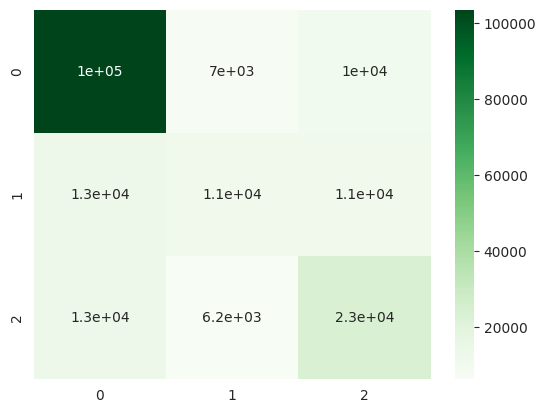

In [ ]:
sns.heatmap(cm_gb_sm_model,cmap="Greens",annot=True)

# Analysis of drinking and smoking on the body

In [ ]:
pd.set_option("display.max_columns", 100)
sns.set_style("darkgrid")
dfff = pd.read_csv("/content/drive/MyDrive/smoking_driking_dataset_Ver01.csv")

1.	sex: Male or Female
2.	age: rounded up to 5 years
3.	height: rouded up to 5 cm
4.	weight: in kg
5.	waistline: in cm
6.	sight_left: left eyesight power; 0.1 is bad, 1.0 is avg, 2.0 is perfect
7.	sight_right: right eyesight power; 0.1 is bad, 1.0 is avg, 2.0 is perfect
8.	hear_left: left hearing; 1 is normal, 2 is abnormal
9.	hear_right: right hearing; 1 is normal, 2 is abnormal
10.	SMK_stat_type_cd: smoking state, 1 never, 2 used to but stopped, 3 still smokes
11.	DRK_YN: drinking or not, y/n


In [ ]:
# Filtering only the columns I am keeping
dfff = dfff[["sex", "age", "height", "weight", "waistline", "sight_left", "sight_right", "hear_left", "hear_right", "SMK_stat_type_cd", "DRK_YN"]]
dfff.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right  SMK_stat_type_cd DRK_YN  
0         1.0               1.0      Y  
1         1.0               3.0      N  
2         1.0               1.0      N  
3         1.0               1.0      N  
4         1.0               1.0      N

In [ ]:
def remove_outliers(df, col):
    # dtype("O") means it contains strings
    if dfff[col].dtype == "O": # Ignore if so
        return dfff

    # Remove outliers on numeric Series
    std = dfff[col].std()
    mean = dfff[col]. mean()
    pos_compar = mean + std * 3
    neg_compar = mean - std * 3

    return dfff[(pos_compar > dfff[col]) & (neg_compar < dfff[col])]

In [ ]:
# Removing specific outliers
# for sight, I am going to run a special operation
# smk is fine
for i in dfff[["height", "weight", "waistline"]]:
    dfff = remove_outliers(dfff, i)

In [ ]:
dfff = dfff[(dfff.sight_left <= 2) & (dfff.sight_right <= 2)]

In [ ]:
dfff = dfff.drop_duplicates() # Removing duplicates

In [ ]:
# Replace hearing data to make it easier to work with
dfff["hearing"] = dfff.apply(lambda row: "Normal" if row["hear_right"] == 1 and row["hear_left"] == 1 else "Abnormal", axis=1)
dfff = dfff.drop(["hear_left", "hear_right"], axis=1)
dfff.head()

sex  age  height  weight  waistline  sight_left  sight_right  \
0  Male   35     170      75       90.0         1.0          1.0   
1  Male   30     180      80       89.0         0.9          1.2   
2  Male   40     165      75       91.0         1.2          1.5   
3  Male   50     175      80       91.0         1.5          1.2   
4  Male   50     165      60       80.0         1.0          1.2   

   SMK_stat_type_cd DRK_YN hearing  
0               1.0      Y  Normal  
1               3.0      N  Normal  
2               1.0      N  Normal  
3               1.0      N  Normal  
4               1.0      N  Normal

In [ ]:
dfff = dfff.drop(dfff[dfff.SMK_stat_type_cd == 2].index)
smoking_replace = {
    1: "N",
    3: "Y"
}
dfff.SMK_stat_type_cd = dfff.SMK_stat_type_cd.replace(smoking_replace)

Control group I am firstly going to create a control group who does not drink and has never smoked, so that I can compare it with the groups who smoke and drink.

In [ ]:
df_control = dfff.query("SMK_stat_type_cd == 'N' and DRK_YN == 'N'")
df_control = df_control.drop(["SMK_stat_type_cd", "DRK_YN"], axis=1)
df_control.describe()

age         height         weight      waistline  \
count  272990.000000  272990.000000  272990.000000  272990.000000   
mean       52.658211     156.944009      58.619913      79.756743   
std        15.298948       8.707494      11.108969       9.738312   
min        20.000000     135.000000      30.000000      48.000000   
25%        40.000000     150.000000      50.000000      73.000000   
50%        55.000000     155.000000      55.000000      80.000000   
75%        65.000000     160.000000      65.000000      86.000000   
max        85.000000     190.000000     100.000000     116.000000   

          sight_left    sight_right  
count  272990.000000  272990.000000  
mean        0.842222       0.840546  
std         0.350286       0.348383  
min         0.100000       0.100000  
25%         0.600000       0.600000  
50%         0.800000       0.800000  
75%         1.000000       1.000000  
max         2.000000       2.000000

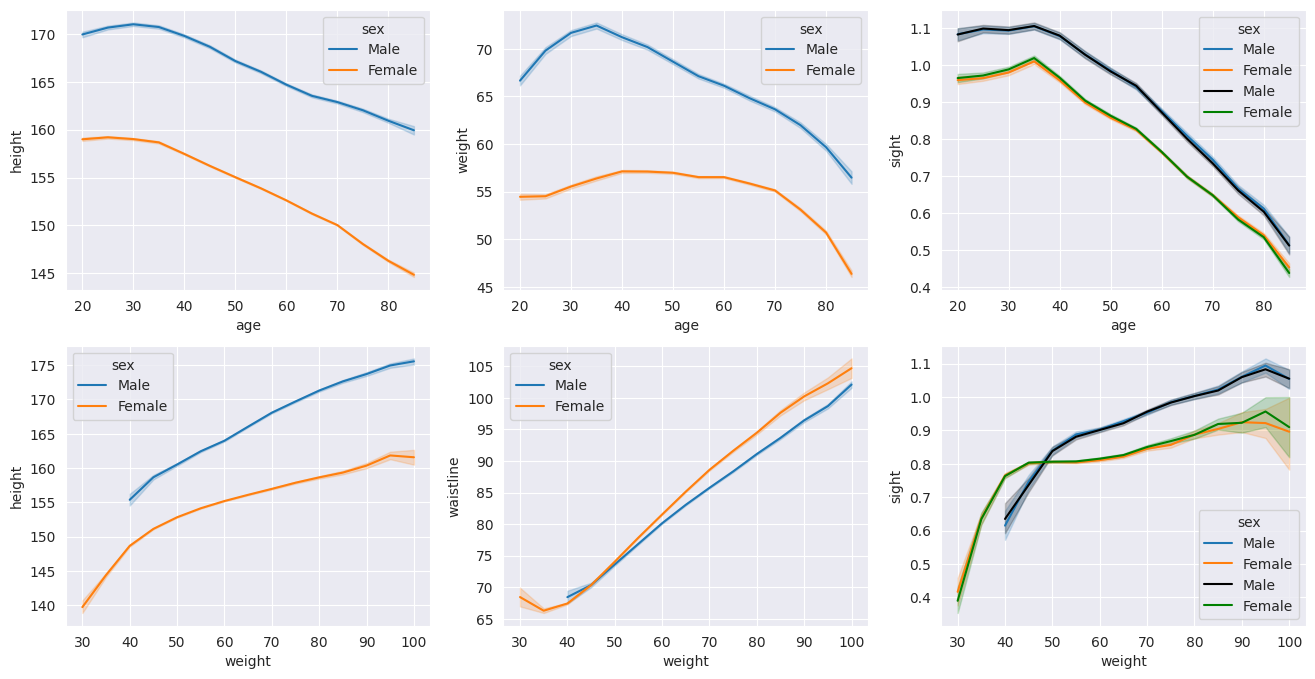

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

sns.lineplot(data=df_control, x="age", y="height", hue="sex", ax=axs[0][0])
sns.lineplot(data=df_control, x="age", y="weight", hue="sex", ax=axs[0][1])
sns.lineplot(data=df_control, x="age", y="sight_right", hue="sex", ax=axs[0][2])
sns.lineplot(data=df_control, x="age", y="sight_left", hue="sex", palette={"Male":"black", "Female":"green"}, ax=axs[0][2])
axs[0][2].set_ylabel("sight")

sns.lineplot(data=df_control, x="weight", y="height", hue="sex", ax=axs[1][0])
sns.lineplot(data=df_control, x="weight", y="waistline", hue="sex", ax=axs[1][1])
sns.lineplot(data=df_control, x="weight", y="sight_right", hue="sex", ax=axs[1][2])
sns.lineplot(data=df_control, x="weight", y="sight_left", hue="sex", palette={"Male":"black", "Female":"green"}, ax=axs[1][2])
axs[1][2].set_ylabel("sight")

plt.show()

Analysis of the physical attributes of non-smokers and non-drinkers
1.	On average, men are taller than women; women also seem to get shorter as they age, whereas with men it seems their height peaks at around the age of 30 and then they slowly start to get shorter with age too :. there is a negative correlation between age and height
2.	Women's weight seems to be consistent as it hovers between 55kg and 58kg, sharply falling after the age of 70. On the other hand, men's weight increases until the age of 35, and after their weight decreases at a faster rate than women's weight; this may be caused by the fact that the average male starts producing less testosterone after the age of 35
3.	This dataset shows that the average healthy male has a better eyesight than the average female. However, both genders' eyesight seem stay consistent until the age of 35, and after it seems that it gets progressively worse.
4.	The dataset is showing that the average male is taller than the average female; weight and height seem to be positively correlated.
5.	Waistline and weight also appears to be positively correlated. However, the ratio of weight to waistline seems to be very similar both men and women.
6.	There does not appear to be any correlation between weight and eyesight; the slight dip at the beginning is due to elders having low body mass, and poorer eyesight, as was shown on a previous graph. The reason why I wanted compare weight and eyesight is that I hypothesised that heavier people would be mre likely to have diabetes, hence it would affect their eyesight.



#Long-term effects of drinking on the body
Now, I am going to take a sample of drinkers, who have never smoked and see how only drinking affects their body. And after, I am going to compare the data I have found against the control group.

In [ ]:
df_drink = dfff[(dfff.SMK_stat_type_cd == "N") & (dfff.DRK_YN == "Y")]
df_drink.head()

sex  age  height  weight  waistline  sight_left  sight_right  \
0     Male   35     170      75       90.0         1.0          1.0   
8     Male   55     170      75       84.0         1.2          0.9   
13    Male   30     175      75       88.0         1.2          1.2   
16  Female   25     160      65       73.0         1.2          0.9   
17    Male   25     170      65       78.0         1.2          1.2   

   SMK_stat_type_cd DRK_YN hearing  
0                 N      Y  Normal  
8                 N      Y  Normal  
13                N      Y  Normal  
16                N      Y  Normal  
17                N      Y  Normal

#Beer belly
Usually, when an alcoholic gets old, they get a beer belly due to the excess calories from alcohol. In this section of my analysis. People start getting a beer belly after the age of 35, so I am going to analyse this substrata of alcoholics.

In [ ]:
# bb = beer belly
bb_df = df_drink[df_drink.age >= 35]
bb_df.head()

sex  age  height  weight  waistline  sight_left  sight_right  \
0     Male   35     170      75       90.0         1.0          1.0   
8     Male   55     170      75       84.0         1.2          0.9   
18    Male   50     170      85       99.0         0.7          0.8   
20  Female   35     170      50       67.0         1.0          0.8   
26  Female   50     145      50       80.0         0.9          1.0   

   SMK_stat_type_cd DRK_YN hearing  
0                 N      Y  Normal  
8                 N      Y  Normal  
18                N      Y  Normal  
20                N      Y  Normal  
26                N      Y  Normal

In [ ]:
# Getting a sample from control group to compare
control_for_bb = df_control[df_control.age >= 35]

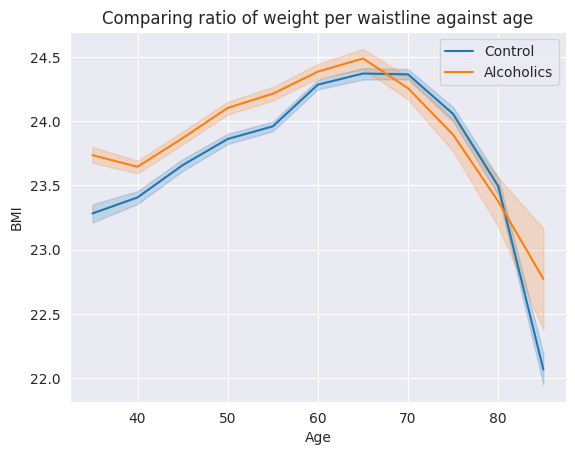

In [ ]:
# Height is in cm, converting to meters before calculating bmi
bb_bmi = bb_df.weight/((bb_df.height/100) ** 2)
normal_bmi = control_for_bb.weight/((control_for_bb.height/100) ** 2)

sns.lineplot(x=control_for_bb.age, y=normal_bmi, label="Control")
sns.lineplot(x=bb_df.age, y=bb_bmi, label="Alcoholics")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Comparing ratio of weight per waistline against age")
plt.legend()
plt.show()

#Beer belly conclusion
There is evidence suggesting people do develop beer bellies as the graph above shows that alcoholics tend to have a higher BMI than the control group, most likely due to the excess calories from alcohol. However, at around 65 years, both the control group and the alcoholic groups BMI seem to be very similar and it seems that it rapidly declining; this may be due to several underlying conditions that an elderly person might have.

# Liver Health Analysis

There is a clear difference between SGOT levels of non drinkers and drinkers which means drinking alchohol can cause many liver related diseases.

<Axes: xlabel='DRK_YN', ylabel='SGOT_ALT'>

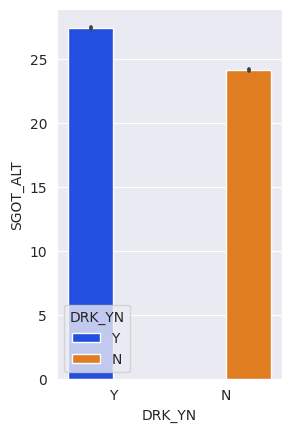

In [ ]:
plt.subplot(1, 2, 1)
sns.barplot(data=dffff, x= 'DRK_YN', y = 'SGOT_ALT', hue = "DRK_YN", palette = 'bright', hue_order=['Y', 'N'])

#Long-term effects of smoking on the body

# HEMOGLOBIN ANALYSIS
Hemoglobin (Hb) is the protein contained in red blood cells that is responsible for delivery of oxygen to the tissues. To ensure adequate tissue oxygenation, a sufficient hemoglobin level must be maintained.we are going to compare the hemoglobin level of the individuals according to their smoking history.

Text(0.5, 1.0, 'Hemoglobin level - Smokers vs Non - Smokers')

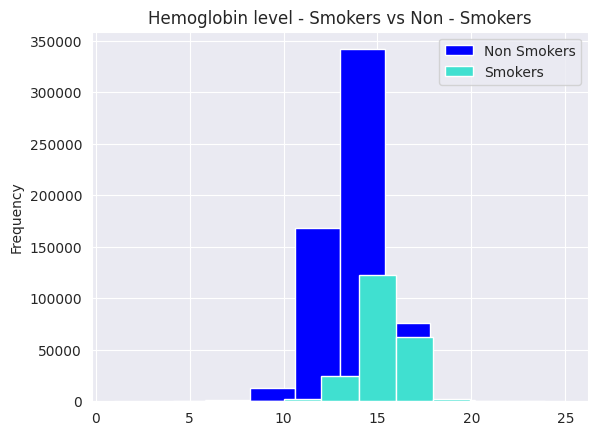

In [ ]:
dffff = pd.read_csv("/content/drive/MyDrive/smoking_driking_dataset_Ver01.csv")
non_smokers = dffff[dffff['SMK_stat_type_cd'] == 1.0]
ex_smokers = dffff[dffff['SMK_stat_type_cd'] == 2.0]
smokers = dffff[dffff['SMK_stat_type_cd'] == 3.0]
non_smokers['hemoglobin'].plot.hist(label='Non Smokers',legend=True,color='blue')
smokers['hemoglobin'].plot.hist(label ='Smokers',legend=True,color='turquoise')
plt.title('Hemoglobin level - Smokers vs Non - Smokers')

There is a clear difference between hb levels of non smokers and smokers which means smoking negatively affects hb levels

#Eyesight strength
I have also found out through google that people's eyesight sight is affected with smoking and alcohol, so I want to prove this again with this dataset.

In [ ]:
df_sd = dfff[(dfff.SMK_stat_type_cd == "Y") & (dfff.DRK_YN == "Y")]

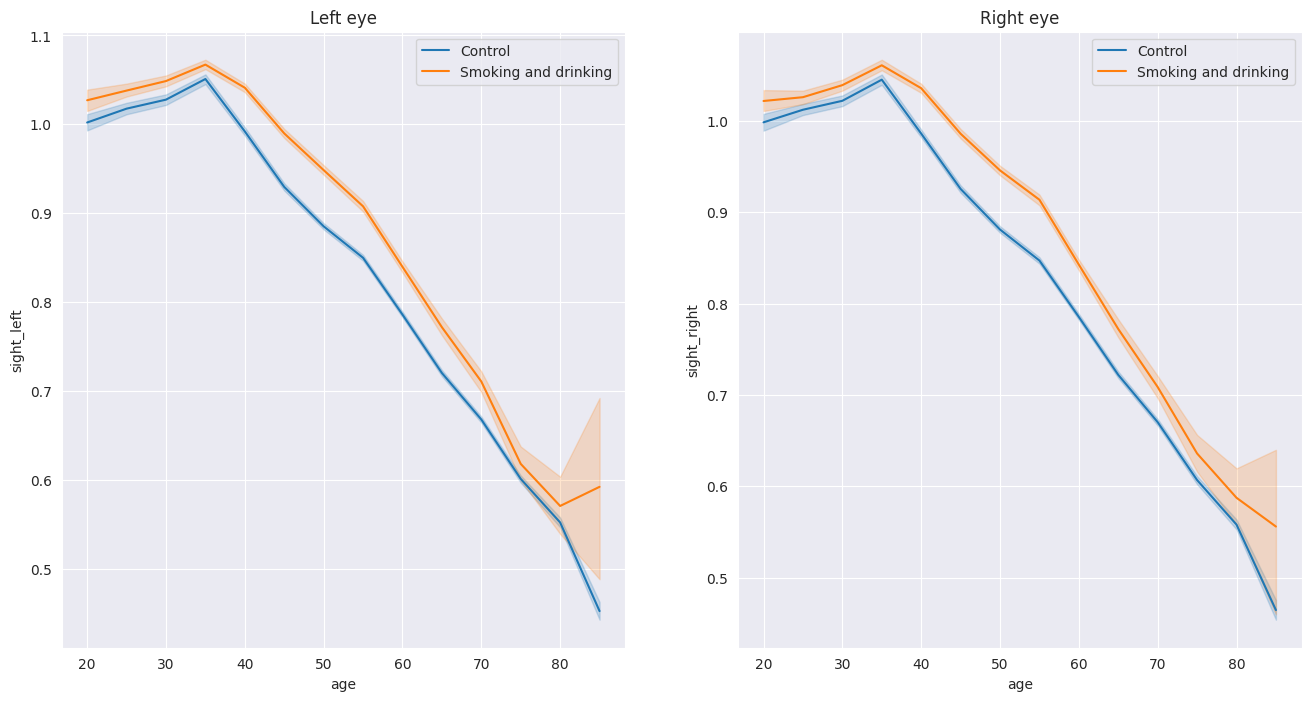

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.lineplot(data=df_control, x="age", y="sight_left", label="Control", ax=axs[0])
sns.lineplot(data=df_sd, x="age", y="sight_left", label="Smoking and drinking", ax=axs[0])
axs[0].set_title("Left eye")

sns.lineplot(data=df_control, x="age", y="sight_right", label="Control", ax=axs[1])
sns.lineplot(data=df_sd, x="age", y="sight_right", label="Smoking and drinking", ax=axs[1])
axs[1].set_title("Right eye")

plt.show()

#Eyesight conclusion
There is not enough evidence suggesting that smoking and drinking negatively affects eyesight on either eye.The difference of eyesight between the control group and people who smoke and drink is negligible.